In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
# load the data
df_train = pd.read_csv('data/train.csv')
#save this integer to have a chance to split data once again.
train_size = df_train.shape[0]
df_test = pd.read_csv('data/test.csv')
#Now reunite this two grids not to make column operations separately.
df = df_train.append(df_test , ignore_index = True)


# Here is the description of the column names and the grid sizes

In [2]:
# basic inspection of frames size and column names
df_train.shape, df_test.shape, df_train.columns.values

((1460, 81),
 (1459, 80),
 array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
        'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
        'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
        'Gara

# Main grid description

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


# Data processing


I will convert all nan values into 0 and all missing values into nan and then 0.

To become data processing easier it will be better to grant some string values appropriate int values

In [4]:
#At first turn numerical nan types into 0.
#To see this process more clearly I will count this numbers for each column name and print them in descending orde
quan = list( df_test.loc[:,df_test.dtypes != 'object'].drop('Id',axis=1).columns.values )
nanValues = df[quan].isnull().sum()
nanValues = nanValues[nanValues > 0]
nanValues = nanValues.sort_values(ascending=False)
print(nanValues)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageCars        1
GarageArea        1
dtype: int64


In [5]:
#Now take care of the quality features of the houses.
#Do the same process as the numerical data types.
qual = list( df_test.loc[:,df_test.dtypes == 'object'].columns.values )
nanSum = df[qual].isnull().sum()
nanSum = nanSum[nanSum > 0]
nunSum = nanSum.sort_values(ascending=False)
print(nunSum)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageQual       159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Utilities          2
Electrical         1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


# Second part of processing to change nan values in the columns.

In [6]:
#At first change numerical type columns nan values;
#This columns ar printed above;
#If Linear feet of street connected to property is nan it may be mean of the others.
df.LotFrontage.fillna(df.LotFrontage.mean(),inplace=True)
#If the house doesn't have the garage its built year must be 0
df.GarageYrBlt.fillna(0,inplace=True)
#If the  Masonry veneer area is nan it must have 0 square meter.
df.MasVnrArea.fillna(0,inplace=True)
#If the Basement half bathrooms is nan this house doesn't have 0 such rooms.
df.BsmtHalfBath.fillna(0, inplace=True)
#If the Basement full bathrooms  is nan there is no such room in the house
df.BsmtFullBath.fillna(0, inplace=True)
#If the Garage area is nan it must be 0 square meter.
df.GarageArea.fillna(0, inplace=True)
#If the Garage cars is nan there is not any car.
df.GarageCars.fillna(0, inplace=True)    
#If the total basemant are is nan there will be 0 square feet.
df.TotalBsmtSF.fillna(0, inplace=True)   
#If the unifinished basemant are is nan there will be 0 square feet.
df.BsmtUnfSF.fillna(0, inplace=True)  
#if Type 2 finished square feet is nan it must be 0.
df.BsmtFinSF2.fillna(0, inplace=True) 
#if Type 2 finished square feet is nan it must be 0.
df.BsmtFinSF1.fillna(0, inplace=True)     

Checking if all the nan values are changed.

In [7]:
quan = list( df_test.loc[:,df_test.dtypes != 'object'].drop('Id',axis=1).columns.values )
nanValues = df[quan].isnull().sum()
nanValues = nanValues[nanValues > 0]
len(nanValues)

0

Assign each quality feature by its appropriate numerical value.

In [8]:
# Filling missing values for categorical features
df.PoolQC.fillna('NA', inplace=True)
df.MiscFeature.fillna('NA', inplace=True)    
df.Alley.fillna('NA', inplace=True)          
df.Fence.fillna('NA', inplace=True)         
df.FireplaceQu.fillna('NA', inplace=True)    
df.GarageCond.fillna('NA', inplace=True)    
df.GarageQual.fillna('NA', inplace=True)     
df.GarageFinish.fillna('NA', inplace=True)   
df.GarageType.fillna('NA', inplace=True)     
df.BsmtExposure.fillna('NA', inplace=True)     
df.BsmtCond.fillna('NA', inplace=True)        
df.BsmtQual.fillna('NA', inplace=True)        
df.BsmtFinType2.fillna('NA', inplace=True)     
df.BsmtFinType1.fillna('NA', inplace=True)     
df.MasVnrType.fillna('None', inplace=True)   
df.Exterior2nd.fillna('None', inplace=True) 

# These are general properties that all houses should have and instead of nan I will choose the most
# popular one which can be get by 'mode' keyword.
df.Functional.fillna(df.Functional.mode()[0], inplace=True)       
df.Utilities.fillna(df.Utilities.mode()[0], inplace=True)          
df.Exterior1st.fillna(df.Exterior1st.mode()[0], inplace=True)        
df.SaleType.fillna(df.SaleType.mode()[0], inplace=True)                
df.KitchenQual.fillna(df.KitchenQual.mode()[0], inplace=True)        
df.Electrical.fillna(df.Electrical.mode()[0], inplace=True)  

In [9]:
qual = list( df_test.loc[:,df_test.dtypes == 'object'].columns.values )
nanSum = df[qual].isnull().sum()
nanSum = nanSum[nanSum > 0]
nunSum = nanSum.sort_values(ascending=False)
#There will be left only MSZoning column with nan values I can decide what value to be assigned to them.
print(nunSum)

MSZoning    4
dtype: int64


In [10]:
#Asiigning the values of the categorical columns with appropriate qualities.
df['Alley'] = df.Alley.map(dict(NA=0, Grvl=1, Pave=2))
df['BsmtCond'] =  df.BsmtCond.map(dict(Na=0, Po=1, Fa=2, TA=3, Gd=4, Ex=5))
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df['BsmtQual'] = df.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df['ExterCond']  = df.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df['ExterQual'] = df.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df['FireplaceQu'] = df.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df['Functional'] = df.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
df['GarageCond'] = df.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df['GarageQual'] = df.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df['HeatingQC'] = df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df['KitchenQual'] = df.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df['LandSlope'] = df.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) 
df['PavedDrive'] = df.PavedDrive.map({'N':1, 'P':2, 'Y':3})
df['PoolQC'] = df.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['Street'] = df.Street.map(dict(Grvl=1, Pave=2))
df['Utilities'] = df.Utilities.map({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4})

# Adding and creating new Columns.

<AxesSubplot:xlabel='totalQuality', ylabel='SalePrice'>

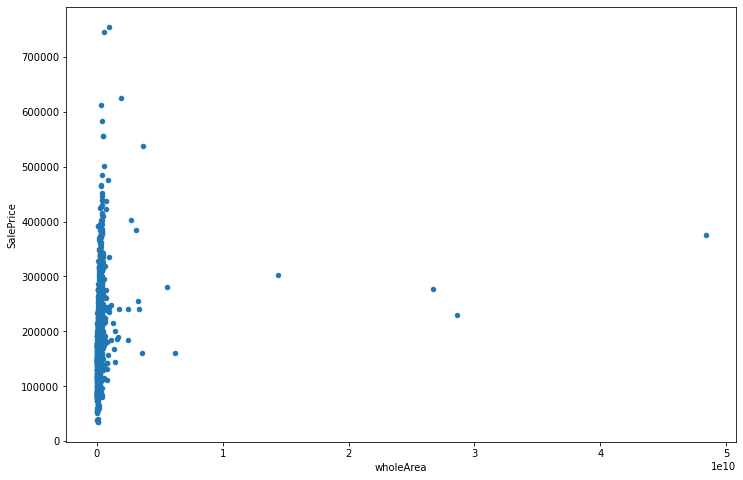

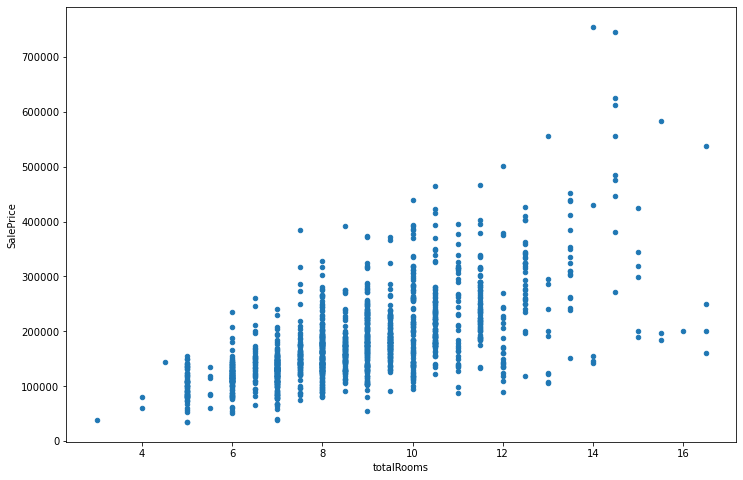

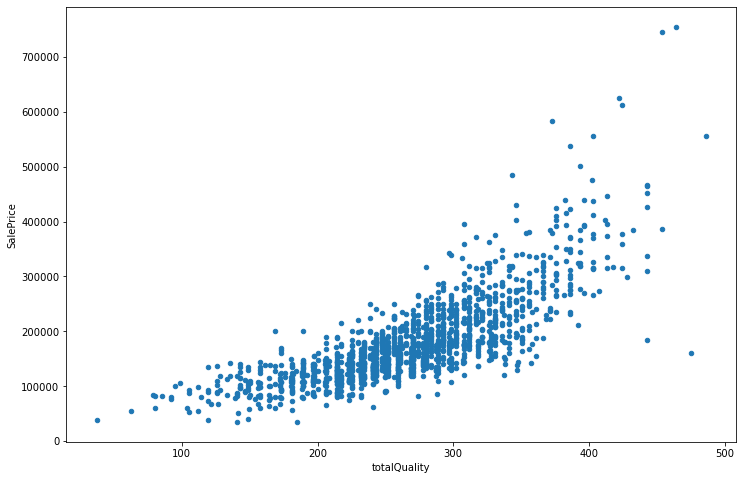

In [11]:
#This column counts the whole area which is occupied by the home
df['wholeArea'] = (df.LotArea + df.TotalBsmtSF + df.WoodDeckSF + df.GrLivArea +df['3SsnPorch']
                  +df.OpenPorchSF + df.ScreenPorch + df.EnclosedPorch
                 +df.MasVnrArea + df.GarageArea + df.PoolArea)**2
#Total num  of rooms half number of rooms are multiplied by 0.5
df['totalRooms'] = (df.TotRmsAbvGrd + df.BsmtFullBath + 0.5*(df.BsmtHalfBath + df.HalfBath)+ df.FullBath)

#This column counts the extra quality feature value and takes overall quality in two degrees.
df['totalQuality'] = (df.ExterQual + df.FireplaceQu + df.GarageQual + df.KitchenQual +
                       df.BsmtQual + df.BsmtExposure + df.BsmtFinType1 + df.PoolQC + 
                      df.ExterCond  + df.GarageCond + df.OverallCond +
                     df.BsmtFinType2 + df.HeatingQC )**(1.5) + df.OverallQual**2
#Here are some graphs about the columns which I added.
#From the whole area graph we can see that most of the data is in one segment but average increases as area increases.
df.plot(kind='scatter',x='wholeArea',y='SalePrice',figsize=(12,8))
#From this graph we will see that most of the houses rooms are near 10 and as it increase average price increases almost linearly.
df.plot(kind='scatter',x='totalRooms',y='SalePrice',figsize=(12,8))
#Every quality features sum gives us parabolic like increasing graph as number of quality increases so does the price somewhere in square.
df.plot(kind='scatter',x='totalQuality',y='SalePrice',figsize=(12,8))

<AxesSubplot:xlabel='soldTime', ylabel='SalePrice'>

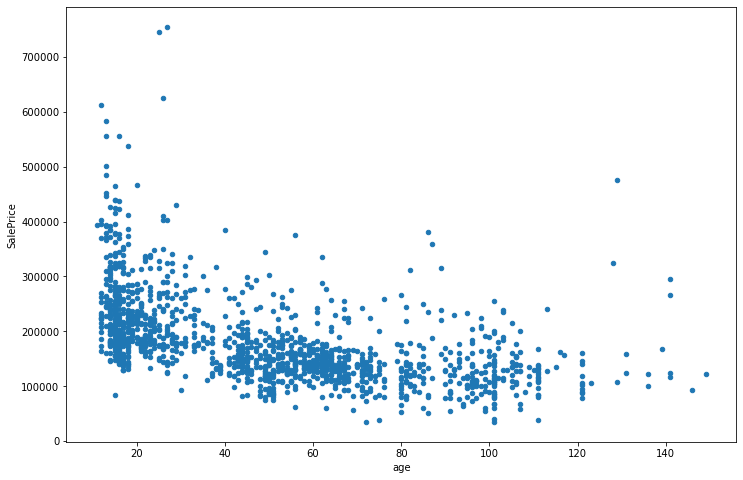

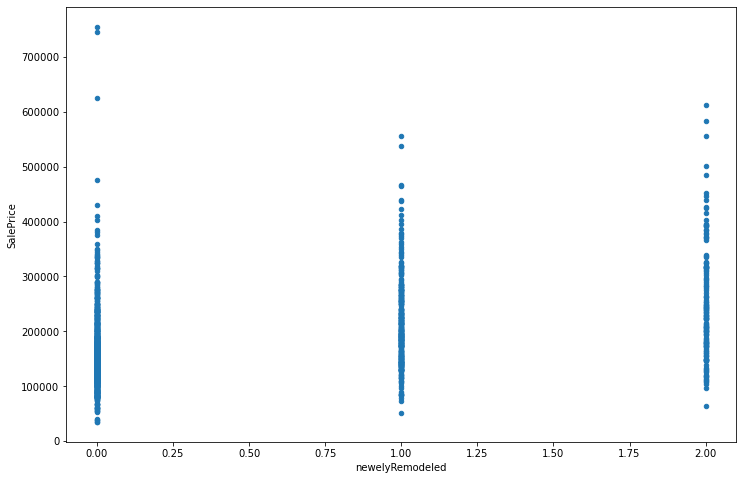

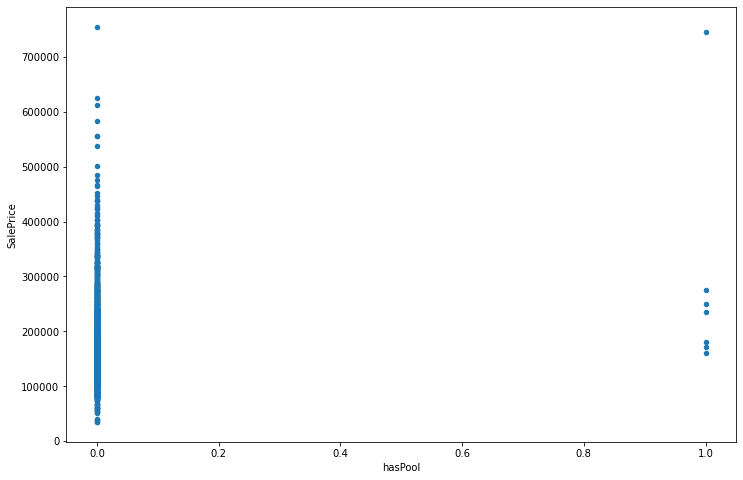

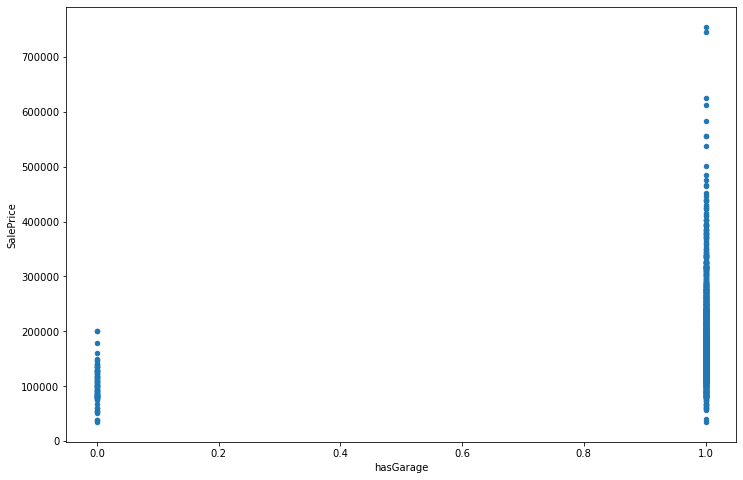

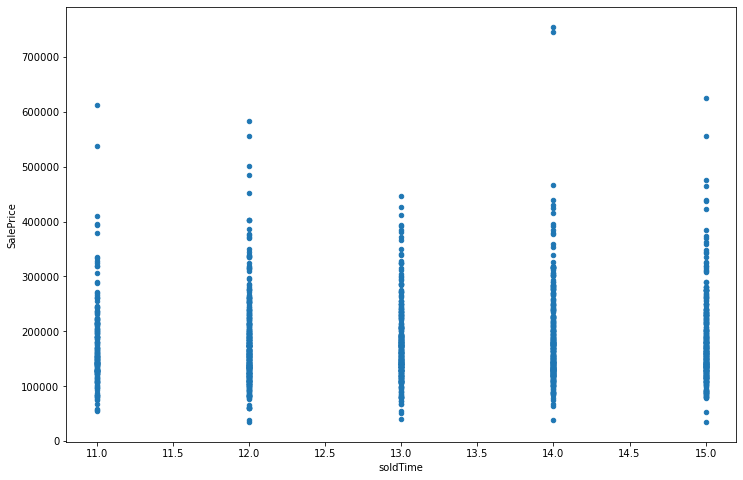

In [12]:
#Total count of bathrooms
df['totalBath'] = df.BsmtFullBath + 0.5*(df.BsmtHalfBath + df.HalfBath)+ df.FullBath

#This column defines if the house is newly remodelled or not.
df['newelyRemodeled'] = ((2021 - df["YearRemodAdd"])<20)*1 + ((2021 - df["YearRemodAdd"])<15)*1
#Time after last sold
df['soldTime'] = 2021- df['YrSold']
#House years old definer column
df['age'] = 2021 - df['YearBuilt']
#this column  gives info if house has pool or not
df['hasPool'] = (df['PoolArea']>0)*1
#This column define garage
df['hasGarage'] = (df['GarageArea']>0)*1
#Two floor building
df['highBuilding'] = (df['2ndFlrSF']>0)*1
#Here is the graphics of the columns which I added and the salePrice
#From this graph we will see as age of house increases price decreases like parabolic function.
df.plot(kind='scatter',x='age',y='SalePrice',figsize=(12,8))
#In this graph we can see that newlyRemodeled houses have more mean price than olderRemodeled ones.
df.plot(kind='scatter',x='newelyRemodeled',y='SalePrice',figsize=(12,8))
#Few of the houses have pools but it is remarkable that their average price is strictly greatere than houses without pools.
df.plot(kind='scatter',x='hasPool',y='SalePrice',figsize=(12,8))
#Garage has most of the houses and without garage houses have very least prices.
df.plot(kind='scatter',x='hasGarage',y='SalePrice',figsize=(12,8))
#This graph splits the data almost the same parts but we can see that newSold houses has a bit more prices now.
df.plot(kind='scatter',x='soldTime',y='SalePrice',figsize=(12,8))

# Divide numerical and quality features


In [13]:
#Total number of the numerical and categorical features.
number_cols = df.select_dtypes(include=np.number).columns
string_cols = df.select_dtypes(exclude=np.number).columns
print("Numerical features : " + str(len(number_cols)))
print("Categorical features : " + str(len(string_cols)))
df_num = df[number_cols]
df_strings = df[string_cols]

Numerical features : 67
Categorical features : 24


In [14]:
#Creating dummy's list of variables of the categorical features and add them to the data frame
df_strings = pd.get_dummies(df_strings)
df = pd.concat([df_num,df_strings],axis=1)

# After uniting this datas now its time to split them into training and test data.

In [15]:
#This integer defines the number to divide train into train and validation tests.
x_size = int(train_size * (0.8))
#Drop this three columns from dataframe .
x_train_val = df.drop(['Id','SalePrice', "BsmtCond"],axis=1)
#Normalize all values in the frame
x_train_val = (x_train_val - x_train_val.min()) / (x_train_val.max() - x_train_val.min())
#Define train frame
x_train = x_train_val[:x_size]
#Define train value frame (vector)
y_train  = df[:x_size]['SalePrice']
#Define validation features frame
x_val = x_train_val[x_size:train_size]
#Define validation values frame
y_val = df[x_size:train_size]['SalePrice']
#Final test frame
x_test = x_train_val[train_size:]
pd.set_option('display.max_rows', 500)

#Check the shapes of the frames.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1168, 242)
(292, 242)
(1459, 242)


In [16]:
#Normalize function of sale prices by using natural logarithm
y_train = np.log(y_train)
y_val = np.log(y_val)

In [17]:
#Checks if the sum is the nan I mistook somewhere.
np.sum(np.sum(x_train)), np.sum(np.matrix(x_train))

(54497.42086686734, 54497.42086686734)

In [18]:
#Convert data frames into matrixes.
x_train = np.matrix(x_train.to_numpy())
y_train = np.matrix(y_train.to_numpy())
x_val = np.matrix(x_val.to_numpy())
y_val = np.matrix(y_val.to_numpy())

In [19]:
#Typica const functions for linear regression which takes predicted and actual values
def cost(y_pred, y, thetas, reg_rate):
    #For optimization get thetas in square.
    thetasSquare = np.sum(np.square(thetas[1:]))
    return (reg_rate * thetasSquare + np.sum(np.square(y_pred - y))) / 2 / len(y)

In [20]:
#Gradient descent function which gives train and validation features and their values ,
#also alpha , regularization rate and number of iterations.
def gradient_descent(x_train, y_train, x_val, y_val, alpha, reg_rate, num_iter):
    #This is not to get different results for different randoms
    np.random.seed(2)
    
    #Insert ones for the first coordinate
    x_train = np.insert(x_train, 0, values=np.ones(x_train.shape[0]), axis=1)
    x_val   = np.insert(x_val, 0, values=np.ones(x_val.shape[0]), axis=1)
    
    #Randomize thetas
    thetas = (np.random.random(size=(1,x_train.shape[1])) -0.5 )* (0.25)
    
    #Array to store values of the cost functions of train and validation sets
    J_train = []
    J_val   = []
    
    for i in range(num_iter):
        #Current predictions of the train and validation sets
        y_pred_train = x_train * thetas.T
        y_pred_val   = x_val   * thetas.T
        
        #Count the losts of the predictions by using cost functions
        train_loss = cost(y_pred_train, y_train,thetas,reg_rate)
        val_loss = cost(y_pred_val, y_val,thetas,reg_rate)
        J_train.append(train_loss)
        J_val.append(val_loss)
        #Prints the cost function values of the current iteration divided by tab.
        print(i, "\t", train_loss, "\t", val_loss)
        
        #Thetas updated function  with reg_rate and differential.
        thetas = thetas - (((y_pred_train - y_train.T).T* x_train))* alpha / x_train.shape[0]
        #For optimization add reg_rate functionality.
        thetas[1:] = thetas[1:] + thetas[1:] * reg_rate / x_train.shape[0]
        
    return thetas, J_train, J_val

In [21]:
#This functions uses gradient descent algorithm too but instead of number of iterations it uses epsilon and if the loss is
# less than this epsilon cycle finish working.
def gradient_descent_epsilon(x_train, y_train, x_val, y_val, alpha, reg_rate, epsilon):
    #This is not to get different results for different randoms
    np.random.seed(2)
    
    #Insert ones for the first coordinate
    x_train = np.insert(x_train, 0, values=np.ones(x_train.shape[0]), axis=1)
    x_val   = np.insert(x_val, 0, values=np.ones(x_val.shape[0]), axis=1)
    
    #Randomize thetas
    thetas = (np.random.random(size=(1,x_train.shape[1])) -0.5 )* (0.25)
    
    #Array to store values of the cost functions of train and validation sets
    J_train = []
    J_val   = []
    i=0
    while True:
        #Current predictions of the train and validation sets
        y_pred_train = x_train * thetas.T
        y_pred_val   = x_val   * thetas.T
        
        #Count the losts of the predictions by using cost functions
        train_loss = cost(y_pred_train, y_train,thetas,reg_rate)
        val_loss = cost(y_pred_val, y_val,thetas,reg_rate)
        J_train.append(train_loss)
        J_val.append(val_loss)
        #Prints the cost function values of the current iteration divided by tab.
        print(i, "\t", train_loss, "\t", val_loss, "\t",J_train[i-1]-train_loss)
        i+=1
        #Thetas updated function  with reg_rate and differential.
        thetas = thetas - (((y_pred_train - y_train.T).T* x_train))* alpha / x_train.shape[0]
        #For optimization add reg_rate functionality.
        thetas[1:] = thetas[1:] + thetas[1:] * reg_rate / x_train.shape[0]
        if i>1 and ((J_train[i-2]-train_loss) < epsilon):
            break
        
    return thetas, J_train, J_val

In [22]:
thetas_eps, J_train_eps, J_val_eps = gradient_descent_epsilon(x_train,y_train,x_val,y_val,0.06,6,0.08)

0 	 102012291.32650624 	 6400249.317218698 	 0.0
1 	 61454994.91768529 	 3818854.536872745 	 40557296.40882095
2 	 36400235.42745992 	 2285557.7286226717 	 25054759.490225375
3 	 22251142.97934914 	 1376160.3816668838 	 14149092.448110778
4 	 13267025.402817275 	 832787.9070567368 	 8984117.576531865
5 	 8360264.933809707 	 512496.94446061703 	 4906760.469007568
6 	 5097286.701635614 	 318670.96946204046 	 3262978.232174093
7 	 3410692.81196093 	 205819.92231100673 	 1686593.889674684
8 	 2199103.293072715 	 135759.1121704141 	 1211589.518888215
9 	 1626213.5699941327 	 95874.93270874642 	 572889.7230785822
10 	 1159135.3142607762 	 69875.70861074791 	 467078.2557333566
11 	 966785.5503525131 	 55614.80161879408 	 192349.76390826306
12 	 775410.9930636849 	 45469.13928261486 	 191374.5572888282
13 	 710538.5507254447 	 40187.64487400257 	 64872.44233824022
14 	 624646.4132546696 	 35862.16015141338 	 85892.13747077505
15 	 601129.0292454215 	 33724.13060777821 	 23517.38400924811
16 	 

129 	 283984.2124352853 	 15837.724061950414 	 485.524544499116
130 	 283505.1648331862 	 15816.18812405233 	 479.04760209913366
131 	 283032.46733896754 	 15795.001372567307 	 472.6974942186498
132 	 282565.9964306136 	 15774.156155796878 	 466.4709083539201
133 	 282105.6317910035 	 15753.645031940208 	 460.3646396101103
134 	 281651.2562044689 	 15733.460762235954 	 454.37558653461747
135 	 281202.7554573848 	 15713.596304367049 	 448.50074708409375
136 	 280760.018242549 	 15694.044806113328 	 442.7372148358263
137 	 280322.9360672327 	 15674.799599244194 	 437.08217531628907
138 	 279891.4031646741 	 15655.8541936374 	 431.532902558567
139 	 279465.31640891964 	 15637.202271617192 	 426.08675575448433
140 	 279044.57523280755 	 15618.837682499658 	 420.7411761120893
141 	 278629.0815490012 	 15600.754437338546 	 415.4936838063295
142 	 278218.73967390513 	 15582.946703861324 	 410.34187509608455
143 	 277813.4562543581 	 15565.408801588666 	 405.28341954702046
144 	 277413.1401969

261 	 250497.9880263536 	 14513.40512089667 	 131.97281312732957
262 	 250366.99898144978 	 14509.048144658549 	 130.98904490380664
263 	 250236.98307769 	 14504.730608819867 	 130.01590375977685
264 	 250107.929833255 	 14500.452010907953 	 129.05324443499558
265 	 249979.8289091504 	 14496.211856187208 	 128.10092410459765
266 	 249852.6701068197 	 14492.009657516632 	 127.15880233069765
267 	 249726.4433658022 	 14487.84493521025 	 126.22674101751181
268 	 249601.13876144786 	 14483.717216901101 	 125.30460435434361
269 	 249476.7465026694 	 14479.626037407694 	 124.39225877844729
270 	 249353.25692974555 	 14475.570938603742 	 123.4895729238633
271 	 249230.6605121675 	 14471.551469290596 	 122.59641757805366
272 	 249108.94784652552 	 14467.567185072328 	 121.7126656419714
273 	 248988.10965444442 	 14463.617648233787 	 120.83819208110799
274 	 248868.13678055024 	 14459.702427620896 	 119.97287389417761
275 	 248749.0201904898 	 14455.821098523977 	 119.1165900604392
276 	 248630

391 	 239021.41125313943 	 14157.873842125846 	 59.45076048802002
392 	 238962.25732582403 	 14156.162387560642 	 59.15392731540487
393 	 238903.3979193863 	 14154.460335249576 	 58.85940643772483
394 	 238844.83074488922 	 14152.767596490421 	 58.56717449708958
395 	 238786.55353646705 	 14151.084083614516 	 58.27720842216513
396 	 238728.56405105244 	 14149.409709973284 	 57.98948541461141
397 	 238670.8600681012 	 14147.744389924608 	 57.70398295123596
398 	 238613.43938932338 	 14146.088038819542 	 57.42067877782392
399 	 238556.29983841607 	 14144.440572989117 	 57.13955090730451
400 	 238499.43926080537 	 14142.801909731588 	 56.86057761069969
401 	 238442.8555233815 	 14141.17196729942 	 56.5837374238763
402 	 238386.54651425013 	 14139.550664886996 	 56.30900913136429
403 	 238330.51014247633 	 14137.937922618094 	 56.03637177380733
404 	 238274.7443378393 	 14136.3336615338 	 55.765804637019755
405 	 238219.2470505857 	 14134.737803580401 	 55.49728725361638
406 	 238164.01625

520 	 233216.91371186308 	 13992.219385548411 	 34.37573678759509
521 	 233182.66165031772 	 13991.240339506525 	 34.25206154535408
522 	 233148.5325406171 	 13990.26456592968 	 34.129109700617846
523 	 233114.52566510104 	 13989.292042214907 	 34.00687551606097
524 	 233080.64031179086 	 13988.322745973875 	 33.8853533101792
525 	 233046.8757743353 	 13987.356655030557 	 33.76453745557228
526 	 233013.23135195262 	 13986.393747418748 	 33.64442238266929
527 	 232979.70634938072 	 13985.434001379928 	 33.52500257189968
528 	 232946.3000768214 	 13984.477395360807 	 33.40627255931031
529 	 232913.0118498893 	 13983.5239080112 	 33.28822693211259
530 	 232879.84098955788 	 13982.573518181714 	 33.170860331418226
531 	 232846.7868221093 	 13981.626204921506 	 33.054167448572116
532 	 232813.8486790828 	 13980.681947476187 	 32.938143026520265
533 	 232781.0258972249 	 13979.740725285643 	 32.82278185788891
534 	 232748.31781843875 	 13978.802517981849 	 32.70807878614869
535 	 232715.7237

652 	 229544.70683495828 	 13884.822707082518 	 22.676337910525035
653 	 229522.09310283113 	 13884.138915091768 	 22.613732127152616
654 	 229499.54169357993 	 13883.4566382525 	 22.55140925120213
655 	 229477.05232608505 	 13882.775869275685 	 22.48936749488348
656 	 229454.6247210011 	 13882.096600927678 	 22.427605083939852
657 	 229432.25860073967 	 13881.418826029494 	 22.366120261431206
658 	 229409.95368946058 	 13880.742537456623 	 22.304911279090447
659 	 229387.7097130523 	 13880.067728138189 	 22.243976408295566
660 	 229365.52639912433 	 13879.394391056756 	 22.183313927962445
661 	 229343.4034769873 	 13878.722519247503 	 22.1229221370304
662 	 229321.34067764497 	 13878.052105798039 	 22.06279934232589
663 	 229299.3377337785 	 13877.383143847697 	 22.002943866478745
664 	 229277.3943797324 	 13876.715626587165 	 21.943354046088643
665 	 229255.51035150336 	 13876.049547257955 	 21.884028229047544
666 	 229233.68538672646 	 13875.384899151935 	 21.824964776897104
667 	 2

779 	 227093.01555037574 	 13808.137121503201 	 16.511990915896604
780 	 227076.5408905209 	 13807.601633847833 	 16.474659854837228
781 	 227060.103425312 	 13807.067048962708 	 16.437465208902722
782 	 227043.70301904174 	 13806.533363759423 	 16.400406270258827
783 	 227027.33953670404 	 13806.000575167656 	 16.363482337706955
784 	 227011.01284399186 	 13805.468680135313 	 16.3266927121731
785 	 226994.7228072889 	 13804.937675628054 	 16.290036702965153
786 	 226978.46929366954 	 13804.407558629517 	 16.25351361936191
787 	 226962.25217088943 	 13803.878326140806 	 16.217122780100908
788 	 226946.07130738616 	 13803.349975180681 	 16.180863503279397
789 	 226929.9265722684 	 13802.822502785053 	 16.144735117763048
790 	 226913.81783531955 	 13802.295906007357 	 16.10873694883776
791 	 226897.74496698534 	 13801.770181917846 	 16.072868334216764
792 	 226881.7078383747 	 13801.24532760388 	 16.037128610623768
793 	 226865.70632125254 	 13800.721340169537 	 16.001517122174846
794 	 

907 	 225246.6791660604 	 13746.040064856963 	 12.642942934151506
908 	 225234.06055725703 	 13745.599987090154 	 12.618608803371899
909 	 225221.46620829494 	 13745.160526523254 	 12.594348962098593
910 	 225208.89604520623 	 13744.72168156159 	 12.570163088705158
911 	 225196.34999434164 	 13744.283450617471 	 12.546050864591962
912 	 225183.8279823711 	 13743.845832110355 	 12.522011970548192
913 	 225171.32993627826 	 13743.40882446659 	 12.498046092834556
914 	 225158.8557833644 	 13742.972426119655 	 12.474152913870057
915 	 225146.40545123955 	 13742.536635509729 	 12.450332124833949
916 	 225133.97886782716 	 13742.101451084047 	 12.426583412394393
917 	 225121.5759613579 	 13741.666871296487 	 12.402906469244044
918 	 225109.19666037016 	 13741.232894607834 	 12.379300987755414
919 	 225096.8408937085 	 13740.799519485541 	 12.355766661668895
920 	 225084.50859052074 	 13740.366744403813 	 12.332303187751677
921 	 225072.19968025637 	 13739.934567843393 	 12.308910264371661
92

1031 	 223846.67876520322 	 13695.740083517549 	 10.10697584314039
1032 	 223836.5888977356 	 13695.366209493277 	 10.089867467613658
1033 	 223826.51609347033 	 13694.992797395826 	 10.072804265277227
1034 	 223816.46030740393 	 13694.619846244572 	 10.055786066397559
1035 	 223806.42149469702 	 13694.247355062129 	 10.03881270691636
1036 	 223796.3996106789 	 13693.875322874652 	 10.021884018118726
1037 	 223786.39461084254 	 13693.503748711497 	 10.004999836353818
1038 	 223776.406450844 	 13693.132631605346 	 9.988159998552874
1039 	 223766.4350865048 	 13692.761970592232 	 9.97136433920241
1040 	 223756.4804738078 	 13692.391764711438 	 9.954612696979893
1041 	 223746.54256889806 	 13692.022013005502 	 9.937904909747886
1042 	 223736.62132808162 	 13691.652714520245 	 9.921240816445788
1043 	 223726.71670782534 	 13691.283868304705 	 9.904620256274939
1044 	 223716.82866475458 	 13690.915473411089 	 9.88804307076498
1045 	 223706.95715565453 	 13690.547528894871 	 9.87150910004857

1162 	 222655.45968999033 	 13650.371674096878 	 8.197376922966214
1163 	 222647.27468027233 	 13650.051018389306 	 8.185009717999492
1164 	 222639.1020090486 	 13649.730719508534 	 8.172671223728685
1165 	 222630.9416477022 	 13649.410776799588 	 8.160361346410355
1166 	 222622.79356770802 	 13649.091189609288 	 8.148079994163709
1167 	 222614.65774063065 	 13648.77195728615 	 8.135827077378053
1168 	 222606.53413812892 	 13648.45307918064 	 8.123602501727873
1169 	 222598.42273195102 	 13648.134554644952 	 8.111406177893514
1170 	 222590.3234939357 	 13647.816383033018 	 8.099238015332958
1171 	 222582.2363960127 	 13647.49856370064 	 8.08709792298032
1172 	 222574.16141020058 	 13647.18109600532 	 8.074985812127125
1173 	 222566.0985086081 	 13646.863979306332 	 8.06290159249329
1174 	 222558.04766343266 	 13646.547212964742 	 8.050845175428549
1175 	 222550.00884696053 	 13646.230796343287 	 8.038816472137114
1176 	 222541.98203156618 	 13645.914728806523 	 8.026815394347068
1177 	

1289 	 221706.0063455936 	 13612.302040436478 	 6.829174637066899
1290 	 221699.18652066114 	 13612.021997726666 	 6.819824932463234
1291 	 221692.37602592885 	 13611.742241051403 	 6.810494732286315
1292 	 221685.57484194543 	 13611.462769937863 	 6.801183983421652
1293 	 221678.78294931797 	 13611.183583914497 	 6.791892627457855
1294 	 221672.00032870754 	 13610.90468251079 	 6.782620610436425
1295 	 221665.22696083115 	 13610.626065257367 	 6.773367876390694
1296 	 221658.46282646066 	 13610.347731686003 	 6.764134370489046
1297 	 221651.7079064231 	 13610.06968132953 	 6.754920037550619
1298 	 221644.96218160036 	 13609.791913721978 	 6.745724822743796
1299 	 221638.22563292904 	 13609.514428398434 	 6.736548671324272
1300 	 221631.49824139927 	 13609.23722489506 	 6.727391529770102
1301 	 221624.77998805573 	 13608.960302749128 	 6.7182533435407095
1302 	 221618.07085399734 	 13608.683661499073 	 6.709134058386553
1303 	 221611.37082037685 	 13608.407300684372 	 6.700033620494651

1413 	 220925.948864418 	 13579.621260725398 	 5.802955317805754
1414 	 220920.15321053079 	 13579.373399900143 	 5.7956538872094825
1415 	 220914.36484417965 	 13579.12577408657 	 5.788366351131117
1416 	 220908.58375150946 	 13578.878382928197 	 5.781092670193175
1417 	 220902.8099186968 	 13578.631226069036 	 5.773832812672481
1418 	 220897.0433319589 	 13578.384303154167 	 5.76658673788188
1419 	 220891.28397754423 	 13578.137613829134 	 5.759354414680274
1420 	 220885.53184174057 	 13577.891157740474 	 5.752135803661076
1421 	 220879.78691086845 	 13577.644934535329 	 5.744930872111581
1422 	 220874.04917128687 	 13577.398943861786 	 5.737739581585629
1423 	 220868.3186093869 	 13577.153185368477 	 5.730561899981694
1424 	 220862.5952115979 	 13576.907658704988 	 5.7233977889991365
1425 	 220856.878964382 	 13576.66236352151 	 5.716247215896146
1426 	 220851.1698542376 	 13576.41729946908 	 5.709110144380247
1427 	 220845.4678676971 	 13576.17246619942 	 5.701986540516373
1428 	 2

1538 	 220253.89080698614 	 13550.353692624089 	 4.987518249108689
1539 	 220248.90909983087 	 13550.132670538133 	 4.981707155267941
1540 	 220243.9331936 	 13549.91184425204 	 4.975906230858527
1541 	 220238.9630781488 	 13549.69121349115 	 4.9701154512003995
1542 	 220233.9987433567 	 13549.470777981367 	 4.964334792108275
1543 	 220229.0401791268 	 13549.250537449114 	 4.9585642298916355
1544 	 220224.08737538752 	 13549.030491621445 	 4.952803739288356
1545 	 220219.1403220891 	 13548.810640225827 	 4.9470532984123565
1546 	 220214.19900920853 	 13548.590982990447 	 4.941312880575424
1547 	 220209.26342674368 	 13548.371519643842 	 4.935582464851905
1548 	 220204.3335647194 	 13548.152249915327 	 4.929862024291651
1549 	 220199.40941318063 	 13547.933173534504 	 4.924151538754813
1550 	 220194.4909621993 	 13547.714290231756 	 4.918450981320348
1551 	 220189.5782018685 	 13547.495599737806 	 4.9127603308006655
1552 	 220184.67112230646 	 13547.277101784082 	 4.907079562050058
1553

1665 	 219664.47802892266 	 13523.76430671312 	 4.323474006901961
1666 	 219660.1592468192 	 13523.56612487356 	 4.318782103451667
1667 	 219655.84514902445 	 13523.368107959128 	 4.314097794762347
1668 	 219651.53572796047 	 13523.170255755624 	 4.309421063982882
1669 	 219647.2309760667 	 13522.972568049316 	 4.3047518937673885
1670 	 219642.93088579824 	 13522.775044626813 	 4.300090268458007
1671 	 219638.63544962805 	 13522.577685275199 	 4.295436170184985
1672 	 219634.34466004427 	 13522.380489781877 	 4.290789583785227
1673 	 219630.05850955247 	 13522.183457934727 	 4.286150491796434
1674 	 219625.77699067458 	 13521.986589521997 	 4.281518877891358
1675 	 219621.50009594936 	 13521.789884332344 	 4.276894725218881
1676 	 219617.22781793048 	 13521.59334215481 	 4.2722780188778415
1677 	 219612.96014918946 	 13521.396962778863 	 4.267668741027592
1678 	 219608.69708231383 	 13521.200745994363 	 4.263066875631921
1679 	 219604.43860990708 	 13521.004691591552 	 4.25847240674193

1788 	 219166.26331239523 	 13500.564062555006 	 3.7986723120848183
1789 	 219162.46851076753 	 13500.384674713277 	 3.794801627693232
1790 	 219158.67757398367 	 13500.205428243937 	 3.790936783858342
1791 	 219154.89049621418 	 13500.02632297653 	 3.7870777694915887
1792 	 219151.10727164077 	 13499.84735874085 	 3.783224573417101
1793 	 219147.32789445884 	 13499.668535367084 	 3.779377181926975
1794 	 219143.55235887412 	 13499.489852685636 	 3.7755355847184546
1795 	 219139.78065910598 	 13499.311310527339 	 3.7716997681418434
1796 	 219136.01278938353 	 13499.132908723179 	 3.767869722447358
1797 	 219132.24874394975 	 13498.954647104592 	 3.7640454337815754
1798 	 219128.48851705703 	 13498.776525503163 	 3.7602268927148543
1799 	 219124.73210297298 	 13498.598543750972 	 3.7564140840549953
1800 	 219120.97949597376 	 13498.420701680241 	 3.7526069992163684
1801 	 219117.2306903487 	 13498.242999123568 	 3.748805625073146
1802 	 219113.4856803981 	 13498.0654359138 	 3.745009950

1911 	 218726.8390204196 	 13479.511144787202 	 3.3630332239554264
1912 	 218723.47922091716 	 13479.347954141564 	 3.359799502446549
1913 	 218720.12265056552 	 13479.184886021396 	 3.3565703516360372
1914 	 218716.7693048014 	 13479.021940289422 	 3.353345764131518
1915 	 218713.41917907255 	 13478.859116808753 	 3.350125728844432
1916 	 218710.07226883384 	 13478.696415442651 	 3.3469102387025487
1917 	 218706.728569549 	 13478.533836054625 	 3.3436992848291993
1918 	 218703.3880766905 	 13478.37137850842 	 3.340492858522339
1919 	 218700.05078574104 	 13478.209042668055 	 3.3372909494501073
1920 	 218696.71669218972 	 13478.046828397726 	 3.3340935513260774
1921 	 218693.38579153523 	 13477.884735561864 	 3.3309006544877775
1922 	 218690.05807928595 	 13477.7227640252 	 3.327712249272736
1923 	 218686.73355095668 	 13477.560913652615 	 3.3245283292781096
1924 	 218683.41220207242 	 13477.399184309234 	 3.3213488842593506
1925 	 218680.09402816748 	 13477.237575860525 	 3.3181739049

2041 	 218315.60334329907 	 13459.277200183084 	 2.9780539039929863
2042 	 218312.62799570453 	 13459.128866589857 	 2.97534759453265
2043 	 218309.65535083262 	 13458.980639500172 	 2.9726448719156906
2044 	 218306.6854051046 	 13458.83251880375 	 2.9699457280221395
2045 	 218303.71815494637 	 13458.684504390401 	 2.9672501582244877
2046 	 218300.75359679363 	 13458.536596150301 	 2.964558152743848
2047 	 218297.79172708368 	 13458.388793973552 	 2.961869709950406
2048 	 218294.83254226457 	 13458.241097750626 	 2.9591848191048484
2049 	 218291.8760387881 	 13458.09350737209 	 2.9565034764818847
2050 	 218288.92221311436 	 13457.946022728738 	 2.9538256737287156
2051 	 218285.97106170707 	 13457.798643711441 	 2.951151407294674
2052 	 218283.0225810394 	 13457.651370211395 	 2.948480667662807
2053 	 218280.0767675897 	 13457.504202119882 	 2.9458134497108404
2054 	 218277.1336178411 	 13457.35713932833 	 2.9431497486075386
2055 	 218274.19312828622 	 13457.210181728466 	 2.94048955486

2167 	 217960.8895984359 	 13441.391691687073 	 2.663330252165906
2168 	 217958.2285691918 	 13441.255963911846 	 2.661029244103702
2169 	 217955.56983807927 	 13441.120330045549 	 2.6587311125185806
2170 	 217952.91340222946 	 13440.984789997969 	 2.656435849814443
2171 	 217950.2592587763 	 13440.849343678892 	 2.654143453168217
2172 	 217947.60740485933 	 13440.713990998314 	 2.651853916962864
2173 	 217944.95783762302 	 13440.578731866348 	 2.6495672363089398
2174 	 217942.31055421676 	 13440.443566193242 	 2.6472834062587935
2175 	 217939.6655517949 	 13440.308493889443 	 2.645002421864774
2176 	 217937.02282751582 	 13440.173514865424 	 2.642724279081449
2177 	 217934.38237854373 	 13440.038629031915 	 2.640448972088052
2178 	 217931.7442020466 	 13439.90383629967 	 2.638176497130189
2179 	 217929.10829519804 	 13439.769136579669 	 2.635906848561717
2180 	 217926.47465517605 	 13439.634529782981 	 2.633640021987958
2181 	 217923.84327916353 	 13439.500015820846 	 2.63137601251946

2290 	 217649.99940423787 	 13425.375655867563 	 2.4004897604172584
2291 	 217647.60089554463 	 13425.25084116248 	 2.3985086932370905
2292 	 217645.20436557266 	 13425.126110226343 	 2.3965299719711766
2293 	 217642.80981198096 	 13425.001462984108 	 2.3945535917009693
2294 	 217640.4172324291 	 13424.876899360708 	 2.392579551844392
2295 	 217638.0266245854 	 13424.75241928143 	 2.3906078436993994
2296 	 217635.63798611696 	 13424.628022671415 	 2.3886384684592485
2297 	 217633.25131469782 	 13424.503709456081 	 2.38667141913902
2298 	 217630.8666080042 	 13424.379479560886 	 2.3847066936141346
2299 	 217628.48386371633 	 13424.255332911389 	 2.382744287868263
2300 	 217626.10307951897 	 13424.131269433306 	 2.3807841973612085
2301 	 217623.72425310026 	 13424.007289052452 	 2.378826418716926
2302 	 217621.3473821512 	 13423.883391694713 	 2.376870949054137
2303 	 217618.97246436664 	 13423.759577286055 	 2.374917784560239
2304 	 217616.59949744615 	 13423.635845752657 	 2.3729669204

2414 	 217366.98137145353 	 13410.515152246839 	 2.171625980990939
2415 	 217364.8114621748 	 13410.40018439492 	 2.169909278716659
2416 	 217362.64326766538 	 13410.285291774797 	 2.168194509431487
2417 	 217360.47678599705 	 13410.170474323479 	 2.16648166833329
2418 	 217358.31201524375 	 13410.055731978064 	 2.164770753297489
2419 	 217356.1489534815 	 13409.94106467566 	 2.163061762257712
2420 	 217353.987598791 	 13409.82647235358 	 2.161354690499138
2421 	 217351.8279492545 	 13409.711954949145 	 2.1596495364792645
2422 	 217349.67000295737 	 13409.597512399752 	 2.157946297142189
2423 	 217347.51375798814 	 13409.483144642922 	 2.1562449692282826
2424 	 217345.35921243916 	 13409.368851616307 	 2.154545548983151
2425 	 217343.20636440328 	 13409.254633257484 	 2.1528480358829256
2426 	 217341.0552119792 	 13409.140489504343 	 2.151152424077736
2427 	 217338.9057532657 	 13409.026420294636 	 2.1494587135093752
2428 	 217336.75798636614 	 13408.912425566332 	 2.1477668995503336
2

2541 	 217104.50862017064 	 13396.496011587582 	 1.968138220050605
2542 	 217102.5419750395 	 13396.390121207907 	 1.966645131149562
2543 	 217100.57682139546 	 13396.284298697034 	 1.965153644036036
2544 	 217098.6131576419 	 13396.178544001812 	 1.9636637535586488
2545 	 217096.65098218294 	 13396.072857069003 	 1.9621754589607008
2546 	 217094.69029342502 	 13395.967237845507 	 1.9606887579138856
2547 	 217092.73108977685 	 13395.86168627824 	 1.9592036481772084
2548 	 217090.7733696501 	 13395.756202314233 	 1.9577201267529745
2549 	 217088.81713145823 	 13395.650785900603 	 1.9562381918658502
2550 	 217086.86237361684 	 13395.545436984445 	 1.954757841391256
2551 	 217084.90909454462 	 13395.440155513035 	 1.9532790722150821
2552 	 217082.95729266093 	 13395.334941433599 	 1.951801883697044
2553 	 217081.00696638948 	 13395.229794693552 	 1.9503262714424636
2554 	 217079.05811415456 	 13395.124715240263 	 1.9488522349274717
2555 	 217077.11073438387 	 13395.019703021268 	 1.947379

2664 	 216873.33837624142 	 13383.965190661984 	 1.7958330550172832
2665 	 216871.54385555853 	 13383.867268090931 	 1.7945206828881055
2666 	 216869.75064590207 	 13383.769407313346 	 1.7932096564618405
2667 	 216867.95874592825 	 13383.67160828352 	 1.7918999738176353
2668 	 216866.1681542957 	 13383.573870955757 	 1.790591632539872
2669 	 216864.37886966288 	 13383.476195284351 	 1.7892846328322776
2670 	 216862.59089069336 	 13383.378581223818 	 1.78797896951437
2671 	 216860.80421604967 	 13383.281028728568 	 1.7866746436920948
2672 	 216859.0188443979 	 13383.183537753142 	 1.7853716517565772
2673 	 216857.23477440487 	 13383.086108252135 	 1.784069993038429
2674 	 216855.45200473978 	 13382.988740180146 	 1.7827696650929283
2675 	 216853.67053407335 	 13382.891433491863 	 1.78147066643578
2676 	 216851.8903610788 	 13382.794188142056 	 1.7801729945349507
2677 	 216850.11148443038 	 13382.697004085489 	 1.778876648430014
2678 	 216848.3339028048 	 13382.599881277034 	 1.777581625

2791 	 216655.49407696316 	 13372.00872260037 	 1.6393437009246554
2792 	 216653.85588851394 	 13371.918299001434 	 1.6381884492293466
2793 	 216652.21885418132 	 13371.827931792002 	 1.6370343326125294
2794 	 216650.58297283298 	 13371.737620932576 	 1.6358813483384438
2795 	 216648.94824333547 	 13371.647366383606 	 1.6347294975130353
2796 	 216647.3146645603 	 13371.557168105717 	 1.633578775159549
2797 	 216645.68223537764 	 13371.467026059463 	 1.6324291826749686
2798 	 216644.05095466055 	 13371.376940205513 	 1.6312807170907035
2799 	 216642.42082128266 	 13371.28691050454 	 1.6301333778828848
2800 	 216640.7918341198 	 13371.19693691726 	 1.6289871628687251
2801 	 216639.163992049 	 13371.107019404444 	 1.6278420707967598
2802 	 216637.5372939486 	 13371.017157926923 	 1.6266981003864203
2803 	 216635.91173869892 	 13370.927352445546 	 1.62555524968775
2804 	 216634.28732518153 	 13370.837602921223 	 1.6244135173910763
2805 	 216632.66405227812 	 13370.747909314867 	 1.62327290

2919 	 216454.8149237732 	 13360.879787889315 	 1.5002133121015504
2920 	 216453.3157317319 	 13360.79627499734 	 1.499192041286733
2921 	 216451.8175599974 	 13360.712813766238 	 1.4981717345071957
2922 	 216450.32040760698 	 13360.629404161557 	 1.4971523904241621
2923 	 216448.82427360053 	 13360.546046148846 	 1.4961340064473916
2924 	 216447.32915701732 	 13360.462739693628 	 1.4951165832171682
2925 	 216445.83505689976 	 13360.379484761603 	 1.4941001175611746
2926 	 216444.3419722904 	 13360.296281318391 	 1.4930846093629953
2927 	 216442.8499022327 	 13360.213129329657 	 1.4920700576913077
2928 	 216441.35884577123 	 13360.130028761116 	 1.4910564614692703
2929 	 216439.86880195362 	 13360.046979578583 	 1.4900438176118769
2930 	 216438.37976982543 	 13359.963981747767 	 1.4890321281854995
2931 	 216436.89174843702 	 13359.88103523457 	 1.4880213884171098
2932 	 216435.40473683667 	 13359.798140004777 	 1.4870116003439762
2933 	 216433.91873407664 	 13359.715296024366 	 1.48600

3047 	 216270.89526347886 	 13350.598626023386 	 1.3769298145198263
3048 	 216269.5192407828 	 13350.521456878521 	 1.3760226960584987
3049 	 216268.14412438302 	 13350.444335248858 	 1.3751163997803815
3050 	 216266.7699134557 	 13350.367261103955 	 1.3742109273152892
3051 	 216265.3966071791 	 13350.290234413449 	 1.3733062765968498
3052 	 216264.02420473224 	 13350.213255147 	 1.3724024468683638
3053 	 216262.65270529574 	 13350.136323274306 	 1.3714994365000166
3054 	 216261.28210804975 	 13350.05943876509 	 1.3705972459865734
3055 	 216259.91241217728 	 13349.982601589107 	 1.3696958724758588
3056 	 216258.5436168611 	 13349.90581171615 	 1.3687953161715996
3057 	 216257.17572128447 	 13349.829069115978 	 1.3678955766372383
3058 	 216255.80872463374 	 13349.752373758485 	 1.3669966507295612
3059 	 216254.44262609375 	 13349.675725613506 	 1.3660985399910714
3060 	 216253.077424852 	 13349.599124650947 	 1.3652012417442165
3061 	 216251.713120096 	 13349.522570840718 	 1.3643047559

3172 	 216105.663944625 	 13341.31133792514 	 1.2696257204224821
3173 	 216104.3951302223 	 13341.239881396876 	 1.268814402690623
3174 	 216103.12712642542 	 13341.1684687952 	 1.2680037968966644
3175 	 216101.85993252334 	 13341.097100093 	 1.2671939020801801
3176 	 216100.59354780617 	 13341.025775263226 	 1.2663847171643283
3177 	 216099.32797156496 	 13340.954494278825 	 1.2655762412177864
3178 	 216098.0632030911 	 13340.883257112757 	 1.2647684738622047
3179 	 216096.7992416775 	 13340.81206373803 	 1.263961413584184
3180 	 216095.53608661666 	 13340.740914127655 	 1.2631550608493853
3181 	 216094.2737372032 	 13340.669808254677 	 1.262349413445918
3182 	 216093.012192732 	 13340.598746092153 	 1.2615444711991586
3183 	 216091.75145249866 	 13340.527727613191 	 1.2607402333524078
3184 	 216090.49151580007 	 13340.456752790924 	 1.2599366985959932
3185 	 216089.2323819323 	 13340.38582159841 	 1.2591338677739259
3186 	 216087.97405019472 	 13340.314934008902 	 1.2583317375683691


3299 	 215950.78133873246 	 13332.57902012739 	 1.1720218102855142
3300 	 215949.61004401732 	 13332.512933093356 	 1.1712947151390836
3301 	 215948.43947577907 	 13332.44688672496 	 1.1705682382453233
3302 	 215947.2696334017 	 13332.380880997871 	 1.1698423773632385
3303 	 215946.10051627093 	 13332.314915887884 	 1.1691171307757031
3304 	 215944.9321237711 	 13332.24899137066 	 1.1683924998214934
3305 	 215943.76445528728 	 13332.183107421928 	 1.1676684838312212
3306 	 215942.59751020698 	 13332.117264017486 	 1.1669450803019572
3307 	 215941.43128791757 	 13332.051461133145 	 1.1662222894083243
3308 	 215940.2657878064 	 13331.985698744658 	 1.1655001111794263
3309 	 215939.1010092624 	 13331.919976827892 	 1.1647785439854488
3310 	 215937.93695167426 	 13331.854295358662 	 1.1640575881465338
3311 	 215936.77361443217 	 13331.788654312837 	 1.1633372420910746
3312 	 215935.6109969265 	 13331.7230536663 	 1.162617505673552
3313 	 215934.4490985489 	 13331.657493394985 	 1.161898377

3425 	 215808.72521803898 	 13324.564575776105 	 1.0850535640784074
3426 	 215807.64081890485 	 13324.50342740263 	 1.0843991341243964
3427 	 215806.55707366142 	 13324.442316780644 	 1.08374524343526
3428 	 215805.47398177214 	 13324.381243888183 	 1.083091889275238
3429 	 215804.39154269887 	 13324.320208703248 	 1.082439073274145
3430 	 215803.3097559062 	 13324.25921120393 	 1.081786792667117
3431 	 215802.22862085717 	 13324.198251368207 	 1.081135049025761
3432 	 215801.14813701727 	 13324.137329174244 	 1.0804838399053551
3433 	 215800.06830385118 	 13324.076444600101 	 1.0798331660917029
3434 	 215798.98912082537 	 13324.015597623908 	 1.0791830258094706
3435 	 215797.9105874051 	 13323.954788223758 	 1.078533420281019
3436 	 215796.83270305823 	 13323.894016377844 	 1.0778843468578998
3437 	 215795.75546725222 	 13323.833282064319 	 1.077235806005774
3438 	 215794.67887945432 	 13323.77258526132 	 1.0765877978992648
3439 	 215793.60293913409 	 13323.711925947102 	 1.0759403202

3550 	 215678.07751228262 	 13317.206776165629 	 1.0072464075055905
3551 	 215677.07085722912 	 13317.150181516854 	 1.006655053497525
3552 	 215676.0647930553 	 13317.093621996104 	 1.0060641738236882
3553 	 215675.0593192906 	 13317.037097583452 	 1.0054737647005823
3554 	 215674.05443546353 	 13316.980608258853 	 1.0048838270595297
3555 	 215673.05014110333 	 13316.924154002341 	 1.0042943602020387
3556 	 215672.0464357391 	 13316.867734793901 	 1.0037053642445244
3557 	 215671.0433189013 	 13316.811350613603 	 1.003116837790003
3558 	 215670.04079012034 	 13316.755001441468 	 1.00252878095489
3559 	 215669.03884892786 	 13316.698687257607 	 1.0019411924877204
3560 	 215668.0374948544 	 13316.642408042047 	 1.0013540734653361
3561 	 215667.03672743263 	 13316.586163774906 	 1.0007674217631575
3562 	 215666.0365461945 	 13316.529954436288 	 1.000181238137884
3563 	 215665.03695067458 	 13316.473780006376 	 0.9995955199119635
3564 	 215664.03794040412 	 13316.417640465192 	 0.99901027

3677 	 215554.80750754103 	 13310.293787409622 	 0.9357682591653429
3678 	 215553.87227432942 	 13310.241498525673 	 0.9352332116104662
3679 	 215552.93757574886 	 13310.189242338232 	 0.9346985805605073
3680 	 215552.0034113853 	 13310.137018829051 	 0.9341643635707442
3681 	 215551.0697808225 	 13310.084827979783 	 0.9336305627948605
3682 	 215550.13668364752 	 13310.032669772198 	 0.9330971749732271
3683 	 215549.20411944613 	 13309.980544188013 	 0.9325642013864126
3684 	 215548.2720878054 	 13309.92845120904 	 0.9320316407247446
3685 	 215547.34058831132 	 13309.876390816946 	 0.9314994940941688
3686 	 215546.40962055212 	 13309.824362993571 	 0.9309677591954824
3687 	 215545.4791841152 	 13309.772367720692 	 0.9304364369309042
3688 	 215544.54927858943 	 13309.720404980142 	 0.9299055257579312
3689 	 215543.61990356242 	 13309.668474753664 	 0.9293750270153396
3690 	 215542.69105862378 	 13309.61657702312 	 0.9288449386367574
3691 	 215541.7627433628 	 13309.56471177035 	 0.92831

3802 	 215441.91873708434 	 13304.00537958514 	 0.8719811280025169
3803 	 215441.0472421076 	 13303.957039828081 	 0.8714949767454527
3804 	 215440.17623291508 	 13303.9087305737 	 0.8710091925167944
3805 	 215439.30570913982 	 13303.860451805223 	 0.8705237752583344
3806 	 215438.43567041378 	 13303.812203505799 	 0.8700387260469142
3807 	 215437.56611637142 	 13303.763985658657 	 0.8695540423505008
3808 	 215436.69704664577 	 13303.715798246993 	 0.8690697256533895
3809 	 215435.82846087098 	 13303.66764125401 	 0.868585774791427
3810 	 215434.9603586821 	 13303.619514662973 	 0.8681021888914984
3811 	 215434.09273971332 	 13303.571418457108 	 0.867618968768511
3812 	 215433.22560359968 	 13303.523352619659 	 0.8671361136366613
3813 	 215432.35894997692 	 13303.475317133907 	 0.8666536227683537
3814 	 215431.49277848122 	 13303.427311983136 	 0.8661714956979267
3815 	 215430.62708874806 	 13303.379337150596 	 0.8656897331529763
3816 	 215429.76188041404 	 13303.331392619622 	 0.86520

3928 	 215335.81979073724 	 13298.14941114185 	 0.813510450796457
3929 	 215335.00672276405 	 13298.104785735995 	 0.8130679731839336
3930 	 215334.19409694197 	 13298.06018879675 	 0.8126258220872842
3931 	 215333.38191294475 	 13298.015620308573 	 0.8121839972154703
3932 	 215332.57017044793 	 13297.971080256037 	 0.8117424968222622
3933 	 215331.75886912455 	 13297.926568623587 	 0.8113013233814854
3934 	 215330.94800865126 	 13297.882085395779 	 0.810860473284265
3935 	 215330.13758870168 	 13297.837630557091 	 0.8104199495865032
3936 	 215329.32760895256 	 13297.793204092088 	 0.8099797491158824
3937 	 215328.51806907883 	 13297.748805985313 	 0.8095398737350479
3938 	 215327.70896875762 	 13297.704436221344 	 0.8091003212030046
3939 	 215326.90030766453 	 13297.660094784707 	 0.8086610930913594
3940 	 215326.09208547688 	 13297.615781660008 	 0.8082221876538824
3941 	 215325.28430187175 	 13297.571496831824 	 0.8077836051234044
3942 	 215324.47695652637 	 13297.527240284753 	 0.8

4055 	 215235.99220325443 	 13292.704673289698 	 0.7598281464306638
4056 	 215235.2327784759 	 13292.663542196975 	 0.7594247785164043
4057 	 215234.47375677482 	 13292.622437676077 	 0.7590217010874767
4058 	 215233.7151378621 	 13292.581359712727 	 0.7586189127177931
4059 	 215232.95692144733 	 13292.540308292522 	 0.7582164147752337
4060 	 215232.19910724176 	 13292.499283401208 	 0.7578142055717763
4061 	 215231.4416949551 	 13292.458285024402 	 0.7574122866499238
4062 	 215230.68468430048 	 13292.417313147907 	 0.7570106546336319
4063 	 215229.9280749868 	 13292.376367757295 	 0.7566093136847485
4064 	 215229.17186672756 	 13292.33544883839 	 0.7562082592339721
4065 	 215228.41605923345 	 13292.294556376826 	 0.7558074941043742
4066 	 215227.66065221693 	 13292.253690358362 	 0.7554070165206213
4067 	 215226.905645391 	 13292.212850768781 	 0.7550068259297404
4068 	 215226.15103846774 	 13292.172037593777 	 0.7546069232630543
4069 	 215225.39683116024 	 13292.131250819139 	 0.7542

4180 	 215144.09831029474 	 13287.764744982554 	 0.7115753502876032
4181 	 215143.38710398902 	 13287.726826940832 	 0.7112063057138585
4182 	 215142.67626646624 	 13287.688933743757 	 0.7108375227835495
4183 	 215141.9657974693 	 13287.65106537814 	 0.710468996927375
4184 	 215141.25569673727 	 13287.613221830576 	 0.7101007320452482
4185 	 215140.54596401268 	 13287.57540308785 	 0.7097327245865017
4186 	 215139.83659903644 	 13287.537609136642 	 0.7093649762391578
4187 	 215139.12760155086 	 13287.499839963712 	 0.7089974855771288
4188 	 215138.41897129753 	 13287.46209555578 	 0.7086302533280104
4189 	 215137.71070801854 	 13287.424375899578 	 0.7082632789970376
4190 	 215137.00281145616 	 13287.38668098187 	 0.7078965623804834
4191 	 215136.29528135326 	 13287.349010789392 	 0.7075301028962713
4192 	 215135.5881174529 	 13287.31136530894 	 0.7071639003697783
4193 	 215134.881319497 	 13287.273744527245 	 0.7067979558778461
4194 	 215134.17488723117 	 13287.236148431184 	 0.7064322

4305 	 215057.9754015022 	 13283.213383351065 	 0.6673849254730158
4306 	 215057.30835489408 	 13283.178470222716 	 0.6670466081122868
4307 	 215056.6416463709 	 13283.143580334941 	 0.6667085231747478
4308 	 215055.97527569986 	 13283.10871367534 	 0.6663706710387487
4309 	 215055.3092426487 	 13283.07387023155 	 0.6660330511513166
4310 	 215054.6435469864 	 13283.039049991285 	 0.6656956623191945
4311 	 215053.97818848028 	 13283.004252942115 	 0.6653585061139893
4312 	 215053.3131668985 	 13282.969479071717 	 0.6650215817790013
4313 	 215052.64848201125 	 13282.934728367809 	 0.6646848872478586
4314 	 215051.9841335859 	 13282.900000817997 	 0.6643484253436327
4315 	 215051.32012139208 	 13282.865296410015 	 0.6640121938253287
4316 	 215050.65644519875 	 13282.830615131514 	 0.6636761933332309
4317 	 215049.99310477558 	 13282.795956970203 	 0.6633404231688473
4318 	 215049.33009989216 	 13282.76132191378 	 0.6630048834194895
4319 	 215048.66743031758 	 13282.726709949933 	 0.662669

4433 	 214975.26414918946 	 13278.929254214107 	 0.6259042629390024
4434 	 214974.63855503793 	 13278.897217715785 	 0.6255941515264567
4435 	 214974.01327078923 	 13278.865202930892 	 0.6252842487010639
4436 	 214973.3882962345 	 13278.833209847891 	 0.6249745547247585
4437 	 214972.7636311663 	 13278.801238455337 	 0.6246650682005566
4438 	 214972.13927537642 	 13278.769288741716 	 0.6243557898851577
4439 	 214971.51522865685 	 13278.737360695546 	 0.6240467195748352
4440 	 214970.89149080054 	 13278.705454305406 	 0.6237378563091625
4441 	 214970.26806159967 	 13278.67356955977 	 0.623429200873943
4442 	 214969.64494084654 	 13278.641706447195 	 0.6231207531236578
4443 	 214969.02212833497 	 13278.609864956241 	 0.6228125115740113
4444 	 214968.3996238574 	 13278.578045075443 	 0.6225044775637798
4445 	 214967.77742720715 	 13278.546246793352 	 0.6221966502489522
4446 	 214967.15553817773 	 13278.514470098571 	 0.6218890294258017
4447 	 214966.53395656275 	 13278.48271497964 	 0.621

4555 	 214901.1690557625 	 13275.177729262714 	 0.589559255487984
4556 	 214900.5797824272 	 13275.148258803636 	 0.5892733352957293
4557 	 214899.99079482435 	 13275.118808701654 	 0.5889876028522849
4558 	 214899.40209276578 	 13275.08937894606 	 0.5887020585651044
4559 	 214898.8136760628 	 13275.059969526084 	 0.5884167029871605
4560 	 214898.2255445285 	 13275.030580431057 	 0.588131534284912
4561 	 214897.6376979744 	 13275.001211650186 	 0.5878465541172773
4562 	 214897.0501362135 	 13274.971863172797 	 0.5875617608835455
4563 	 214896.4628590583 	 13274.942534988173 	 0.587277155224001
4564 	 214895.87586632094 	 13274.913227085586 	 0.5869927373423707
4565 	 214895.28915781525 	 13274.883939454394 	 0.5867085056961514
4566 	 214894.7027333538 	 13274.854672083842 	 0.5864244614494964
4567 	 214894.11659275016 	 13274.82542496329 	 0.5861406036419794
4568 	 214893.53073581692 	 13274.796198082002 	 0.5858569332340267
4569 	 214892.945162369 	 13274.766991429386 	 0.585573447926

4684 	 214827.44770353305 	 13271.540419251738 	 0.5541776385507546
4685 	 214826.89378875162 	 13271.513488231603 	 0.5539147814270109
4686 	 214826.340136659 	 13271.486576231044 	 0.5536520926107187
4687 	 214825.78674708432 	 13271.459683239958 	 0.5533895746921189
4688 	 214825.23361985944 	 13271.43280924842 	 0.5531272248772439
4689 	 214824.6807548147 	 13271.405954246391 	 0.5528650447377004
4690 	 214824.12815178177 	 13271.379118223935 	 0.5526030329347122
4691 	 214823.57581059157 	 13271.35230117105 	 0.5523411901958752
4692 	 214823.0237310748 	 13271.325503077729 	 0.5520795167831238
4693 	 214822.47191306352 	 13271.298723934027 	 0.5518180112703703
4694 	 214821.9203563894 	 13271.271963729994 	 0.551556674123276
4695 	 214821.36906088394 	 13271.245222455665 	 0.5512955054582562
4696 	 214820.8180263789 	 13271.218500101062 	 0.5510345050424803
4697 	 214820.26725270652 	 13271.191796656263 	 0.5507736723811831
4698 	 214819.71673969866 	 13271.165112111305 	 0.550513

4811 	 214759.14721168237 	 13268.269076053808 	 0.5221066229278222
4812 	 214758.6253474422 	 13268.244482273916 	 0.5218642401741818
4813 	 214758.10372543166 	 13268.219906285924 	 0.5216220105357934
4814 	 214757.58234549777 	 13268.195348080504 	 0.5213799338962417
4815 	 214757.06120748818 	 13268.170807648328 	 0.5211380095861387
4816 	 214756.54031124915 	 13268.146284980045 	 0.5208962390315719
4817 	 214756.0196566285 	 13268.121780066363 	 0.5206546206609346
4818 	 214755.49924347393 	 13268.097292897972 	 0.5204131545615382
4819 	 214754.97907163267 	 13268.072823465542 	 0.5201718412572518
4820 	 214754.4591409528 	 13268.048371759818 	 0.5199306798749603
4821 	 214753.9394512813 	 13268.023937771415 	 0.5196896714915056
4822 	 214753.42000246723 	 13267.999521491123 	 0.5194488140696194
4823 	 214752.90079435823 	 13267.975122909627 	 0.5192081090062857
4824 	 214752.3818268021 	 13267.950742017618 	 0.5189675561268814
4825 	 214751.8630996475 	 13267.926378805838 	 0.518

4940 	 214693.77439329363 	 13265.240161043852 	 0.49206247477559373
4941 	 214693.282554407 	 13265.21778709409 	 0.491838886635378
4942 	 214692.79093897107 	 13265.19542977292 	 0.4916154359234497
4943 	 214692.2995468465 	 13265.17308907156 	 0.4913921245606616
4944 	 214691.80837789556 	 13265.150764981361 	 0.4911689509463031
4945 	 214691.3174319799 	 13265.128457493583 	 0.4909459156624507
4946 	 214690.82670896212 	 13265.106166599588 	 0.49072301777778193
4947 	 214690.33620870413 	 13265.083892290659 	 0.49050025799078867
4948 	 214689.84593106757 	 13265.061634558118 	 0.4902776365634054
4949 	 214689.3558759152 	 13265.039393393274 	 0.4900551523605827
4950 	 214688.86604310977 	 13265.017168787475 	 0.4898328054405283
4951 	 214688.37643251277 	 13264.994960732021 	 0.4896105969964992
4952 	 214687.8870439878 	 13264.972769218284 	 0.4893885249621235
4953 	 214687.39787739742 	 13264.950594237584 	 0.489166590385139
4954 	 214686.90893260422 	 13264.928435781281 	 0.48894

5068 	 214632.5891171334 	 13262.50852952245 	 0.46453268532059155
5069 	 214632.1247911572 	 13262.488214833314 	 0.4643259762087837
5070 	 214631.66067176504 	 13262.467915695473 	 0.4641193921561353
5071 	 214631.19675883022 	 13262.447632100759 	 0.4639129348215647
5072 	 214630.73305222922 	 13262.42736404113 	 0.4637066010036506
5073 	 214630.26955183543 	 13262.407111508388 	 0.46350039378739893
5074 	 214629.8062575244 	 13262.386874494467 	 0.4632943110191263
5075 	 214629.3431691712 	 13262.366652991223 	 0.4630883532227017
5076 	 214628.88028665018 	 13262.346446990552 	 0.4628825210093055
5077 	 214628.417609838 	 13262.326256484394 	 0.4626768121670466
5078 	 214627.95513860846 	 13262.306081464589 	 0.4624712295481004
5079 	 214627.49287283764 	 13262.285921923081 	 0.4622657708241604
5080 	 214627.03081240066 	 13262.26577785174 	 0.46206043698475696
5081 	 214626.5689571739 	 13262.24564924255 	 0.46185522674932145
5082 	 214626.1073070321 	 13262.225536087364 	 0.46165

5192 	 214576.55009639496 	 13260.105621399549 	 0.4398287904332392
5193 	 214576.11045945738 	 13260.087174402232 	 0.4396369375754148
5194 	 214575.671014258 	 13260.068741980554 	 0.43944519938668236
5195 	 214575.23176068277 	 13260.05032412692 	 0.4392535752267577
5196 	 214574.79269861733 	 13260.031920833711 	 0.4390620654448867
5197 	 214574.35382794772 	 13260.013532093306 	 0.43887066960451193
5198 	 214573.91514856045 	 13259.995157898156 	 0.43867938726907596
5199 	 214573.4766603409 	 13259.97679824064 	 0.4384882195445243
5200 	 214573.03836317649 	 13259.958453113193 	 0.43829716442269273
5201 	 214572.60025695185 	 13259.940122508166 	 0.43810622463934124
5202 	 214572.1623415551 	 13259.921806418055 	 0.43791539676021785
5203 	 214571.72461687145 	 13259.903504835225 	 0.43772468363749795
5204 	 214571.2870827883 	 13259.88521775214 	 0.4375340831466019
5205 	 214570.84973919182 	 13259.866945161202 	 0.4373435964807868
5206 	 214570.41258596958 	 13259.848687054895 	 

5320 	 214521.79692675528 	 13257.860321491307 	 0.4161721134732943
5321 	 214521.380932537 	 13257.843679684609 	 0.415994218288688
5322 	 214520.96511610856 	 13257.82705151165 	 0.4158164284308441
5323 	 214520.54947736755 	 13257.810436965345 	 0.4156387410184834
5324 	 214520.13401620885 	 13257.79383603857 	 0.4154611587000545
5325 	 214519.71873253002 	 13257.77724872427 	 0.4152836788271088
5326 	 214519.3036262265 	 13257.760675015288 	 0.41510630352422595
5327 	 214518.88869719513 	 13257.744114904564 	 0.4149290313653182
5328 	 214518.47394533228 	 13257.727568385006 	 0.41475186284515075
5329 	 214518.05937053412 	 13257.711035449476 	 0.41457479816745035
5330 	 214517.64497269853 	 13257.694516090969 	 0.4143978355859872
5331 	 214517.23075172087 	 13257.67801030236 	 0.41422097766189836
5332 	 214516.816707499 	 13257.661518076593 	 0.4140442218631506
5333 	 214516.40283992945 	 13257.64503940657 	 0.41386756955762394
5334 	 214515.9891489092 	 13257.628574285241 	 0.4136

5442 	 214472.32789644893 	 13255.928585387679 	 0.39521419096854515
5443 	 214471.93284801627 	 13255.913555515415 	 0.3950484326633159
5444 	 214471.53796524636 	 13255.898538436699 	 0.39488276990596205
5445 	 214471.14324804465 	 13255.883534144856 	 0.39471720170695335
5446 	 214470.7486963161 	 13255.868542633232 	 0.3945517285610549
5447 	 214470.35430996513 	 13255.853563895133 	 0.3943863509630319
5448 	 214469.96008889787 	 13255.838597923945 	 0.3942210672539659
5449 	 214469.56603301872 	 13255.823644713006 	 0.39405587915098295
5450 	 214469.1721422341 	 13255.808704255687 	 0.3938907846168149
5451 	 214468.7784164481 	 13255.793776545286 	 0.3937257860088721
5452 	 214468.38485556695 	 13255.778861575218 	 0.39356088114436716
5453 	 214467.99145949614 	 13255.763959338825 	 0.39339607080910355
5454 	 214467.59822814082 	 13255.749069829468 	 0.3932313553232234
5455 	 214467.20516140704 	 13255.734193040524 	 0.39306673378450796
5456 	 214466.8122592004 	 13255.71932896535

5566 	 214424.57639490374 	 13254.160410159642 	 0.3753646920667961
5567 	 214424.201184683 	 13254.146916927304 	 0.3752102207217831
5568 	 214423.8261288465 	 13254.133435688213 	 0.3750558365136385
5569 	 214423.45122730665 	 13254.119966436087 	 0.3749015398498159
5570 	 214423.07647997726 	 13254.106509164734 	 0.3747473293915391
5571 	 214422.701886771 	 13254.093063867887 	 0.3745932062447537
5572 	 214422.32744760189 	 13254.079630539358 	 0.3744391691288911
5573 	 214421.95316238195 	 13254.066209172839 	 0.3742852199357003
5574 	 214421.57903102564 	 13254.052799762188 	 0.37413135630777106
5575 	 214421.20505344612 	 13254.039402301134 	 0.3739775795256719
5576 	 214420.83122955653 	 13254.02601678345 	 0.3738238895894028
5577 	 214420.45755927055 	 13254.01264320294 	 0.3736702859750949
5578 	 214420.0840425016 	 13253.999281553364 	 0.37351676894468255
5579 	 214419.7106791638 	 13253.985931828545 	 0.3733633377996739
5580 	 214419.3374691701 	 13253.972594022227 	 0.37320

5687 	 214380.2722580924 	 13252.613029482724 	 0.3572881060827058
5688 	 214379.91511436077 	 13252.600943034808 	 0.3571437316131778
5689 	 214379.55811492575 	 13252.588867848073 	 0.35699943502550013
5690 	 214379.20125970597 	 13252.576803916554 	 0.3568552197830286
5691 	 214378.844548622 	 13252.56475123443 	 0.35671108396491036
5692 	 214378.4879815947 	 13252.55270979588 	 0.35656702730921097
5693 	 214378.1315585439 	 13252.54067959503 	 0.35642305080546066
5694 	 214377.77527938937 	 13252.52866062599 	 0.3562791545118671
5695 	 214377.41914405272 	 13252.516652882985 	 0.3561353366530966
5696 	 214377.06315245386 	 13252.504656360157 	 0.3559915988589637
5697 	 214376.70730451288 	 13252.492671051636 	 0.35584794098394923
5698 	 214376.35160015142 	 13252.480696951641 	 0.35570436145644635
5699 	 214375.99603928922 	 13252.468734054297 	 0.35556086219730787
5700 	 214375.64062184724 	 13252.456782353784 	 0.3554174419841729
5701 	 214375.28534774654 	 13252.444841844297 	 0

5810 	 214337.40256101426 	 13251.20914320601 	 0.34011297413962893
5811 	 214337.062582992 	 13251.198398835342 	 0.33997802226804197
5812 	 214336.7227398493 	 13251.18766502781 	 0.33984314269036986
5813 	 214336.38303151197 	 13251.176941777898 	 0.3397083373274654
5814 	 214336.04345790748 	 13251.166229080156 	 0.33957360449130647
5815 	 214335.70401896158 	 13251.15552692903 	 0.339438945899019
5816 	 214335.36471460198 	 13251.14483531909 	 0.3393043596006464
5817 	 214335.02554475513 	 13251.13415424484 	 0.3391698468476534
5818 	 214334.68650934866 	 13251.123483700821 	 0.3390354064758867
5819 	 214334.34760830857 	 13251.112823681524 	 0.33890104008605704
5820 	 214334.00884156264 	 13251.102174181513 	 0.33876674593193457
5821 	 214333.67020903702 	 13251.09153519527 	 0.33863252561422996
5822 	 214333.33171066016 	 13251.080906717389 	 0.33849837686284445
5823 	 214332.99334635856 	 13251.070288742369 	 0.33836430159863085
5824 	 214332.65511605924 	 13251.05968126476 	 0

5931 	 214297.22374811542 	 13249.984205241735 	 0.324302200373495
5932 	 214296.89957234607 	 13249.97469995461 	 0.3241757693467662
5933 	 214296.57552293784 	 13249.965204586508 	 0.3240494082274381
5934 	 214296.25159982473 	 13249.955719132366 	 0.3239231131155975
5935 	 214295.9278029391 	 13249.94624358701 	 0.3237968856119551
5936 	 214295.60413221284 	 13249.936777945275 	 0.32367072626948357
5937 	 214295.28058757997 	 13249.92732220206 	 0.32354463287629187
5938 	 214294.95716897116 	 13249.917876352136 	 0.3234186088084243
5939 	 214294.63387632137 	 13249.908440390464 	 0.32329264978761785
5940 	 214294.3107095611 	 13249.899014311814 	 0.3231667602667585
5941 	 214293.9876686253 	 13249.88959811114 	 0.3230409357929602
5942 	 214293.66475344516 	 13249.880191783219 	 0.322915180149721
5943 	 214293.34196395442 	 13249.870795322973 	 0.32278949074679986
5944 	 214293.01930008637 	 13249.861408725299 	 0.32266386804985814
5945 	 214292.69676177352 	 13249.852031985036 	 0.3

6054 	 214258.2782048219 	 13248.887942302923 	 0.30924460230744444
6055 	 214257.96907867416 	 13248.879619196707 	 0.30912614773842506
6056 	 214257.66007091827 	 13248.871305395447 	 0.3090077558881603
6057 	 214257.35118149314 	 13248.863000894333 	 0.3088894251268357
6058 	 214257.04241033568 	 13248.854705688527 	 0.3087711574626155
6059 	 214256.7337573844 	 13248.846419773212 	 0.30865295126568526
6060 	 214256.42522257703 	 13248.838143143545 	 0.308534807380056
6061 	 214256.1168058515 	 13248.829875794694 	 0.3084167255437933
6062 	 214255.8085071464 	 13248.821617721886 	 0.308298705087509
6063 	 214255.5003263991 	 13248.813368920257 	 0.3081807472917717
6064 	 214255.19226354847 	 13248.805129385008 	 0.3080628506431822
6065 	 214254.88431853193 	 13248.796899111325 	 0.3079450165387243
6066 	 214254.57649128858 	 13248.788678094425 	 0.3078272433485836
6067 	 214254.26878175646 	 13248.780466329463 	 0.3077095321204979
6068 	 214253.9611898737 	 13248.772263811661 	 0.30

6180 	 214220.24083174352 	 13247.910959609224 	 0.294795788009651
6181 	 214219.94614689198 	 13247.903771684236 	 0.2946848515421152
6182 	 214219.6515729206 	 13247.896592474857 	 0.29457397139049135
6183 	 214219.35710977114 	 13247.88942197651 	 0.2944631494465284
6184 	 214219.06275738755 	 13247.882260184708 	 0.29435238358564675
6185 	 214218.76851571182 	 13247.875107094918 	 0.2942416757286992
6186 	 214218.47438468813 	 13247.867962702643 	 0.29413102369289845
6187 	 214218.18036425815 	 13247.860827003335 	 0.29402042998117395
6188 	 214217.8864543656 	 13247.853699992518 	 0.29390989255625755
6189 	 214217.59265495304 	 13247.846581665626 	 0.29379941255319864
6190 	 214217.2989659642 	 13247.839472018199 	 0.29368898883694783
6191 	 214217.00538734227 	 13247.832371045744 	 0.2935786219313741
6192 	 214216.71191902985 	 13247.825278743714 	 0.293468312418554
6193 	 214216.41856097028 	 13247.818195107631 	 0.2933580595708918
6194 	 214216.12531310704 	 13247.811120132985 

6307 	 214183.68433110032 	 13247.066342430422 	 0.28115215414436534
6308 	 214183.40328291093 	 13247.060225963309 	 0.28104818938300014
6309 	 214183.12233863375 	 13247.054117655733 	 0.28094427718315274
6310 	 214182.84149821664 	 13247.048017503479 	 0.2808404171082657
6311 	 214182.56076160638 	 13247.041925502299 	 0.28073661026428454
6312 	 214182.28012875188 	 13247.03584164802 	 0.28063285449752584
6313 	 214181.99959959835 	 13247.029765936313 	 0.2805291535332799
6314 	 214181.7191740953 	 13247.023698363037 	 0.28042550303507596
6315 	 214181.43885218934 	 13247.017638923935 	 0.28032190597150475
6316 	 214181.15863382778 	 13247.011587614748 	 0.28021836155676283
6317 	 214180.878518959 	 13247.005544431344 	 0.28011486877221614
6318 	 214180.59850753084 	 13246.99950936948 	 0.28001142817083746
6319 	 214180.31859949033 	 13246.993482424896 	 0.2799080405093264
6320 	 214180.03879478553 	 13246.987463593437 	 0.27980470479815267
6321 	 214179.7590933637 	 13246.981452870

6429 	 214150.14819266615 	 13246.379128369985 	 0.2688470956054516
6430 	 214149.87944335883 	 13246.373976763554 	 0.2687493073171936
6431 	 214149.61079178925 	 13246.368832816119 	 0.2686515695822891
6432 	 214149.34223791002 	 13246.36369652378 	 0.26855387922842056
6433 	 214149.0737816726 	 13246.35856788256 	 0.26845623741974123
6434 	 214148.80542302833 	 13246.353446888497 	 0.2683586442726664
6435 	 214148.5371619283 	 13246.348333537586 	 0.2682611000200268
6436 	 214148.2689983244 	 13246.343227825897 	 0.2681636039051227
6437 	 214148.00093216755 	 13246.338129749447 	 0.2680661568592768
6438 	 214147.73296341015 	 13246.333039304303 	 0.2679687573981937
6439 	 214147.46509200346 	 13246.327956486495 	 0.2678714066860266
6440 	 214147.197317899 	 13246.322881292057 	 0.26777410446084104
6441 	 214146.92964104767 	 13246.31781371702 	 0.26767685133381747
6442 	 214146.66206140257 	 13246.31275375748 	 0.26757964509306476
6443 	 214146.39457891477 	 13246.307701409465 	 0.2

6553 	 214117.55383909706 	 13245.797524444404 	 0.25708312331698835
6554 	 214117.2968479574 	 13245.79329290148 	 0.2569911396712996
6555 	 214117.03994875602 	 13245.789068540518 	 0.2568992013693787
6556 	 214116.783141448 	 13245.78485135781 	 0.2568073080328759
6557 	 214116.5264259885 	 13245.780641349631 	 0.2567154594871681
6558 	 214116.2698023328 	 13245.776438512285 	 0.2566236557031516
6559 	 214116.0132704351 	 13245.772242841997 	 0.2565318976994604
6560 	 214115.75683025204 	 13245.768054335122 	 0.25644018306047656
6561 	 214115.5004817376 	 13245.76387298789 	 0.2563485144346487
6562 	 214115.24422484785 	 13245.75969879662 	 0.2562568897556048
6563 	 214114.98805953684 	 13245.755531757579 	 0.25616531100240536
6564 	 214114.73198576173 	 13245.751371867114 	 0.2560737751191482
6565 	 214114.47600347627 	 13245.747219121447 	 0.2559822854527738
6566 	 214114.22011263613 	 13245.743073516911 	 0.255890840140637
6567 	 214113.96431319675 	 13245.738935049805 	 0.255799

6675 	 214086.86648975668 	 13245.333203914717 	 0.24618497409392148
6676 	 214086.62039148167 	 13245.329821654535 	 0.24609827500535175
6677 	 214086.3743798631 	 13245.326446136089 	 0.24601161858299747
6678 	 214086.12845486062 	 13245.323077355913 	 0.24592500246944837
6679 	 214085.88261643148 	 13245.319715310481 	 0.24583842913853005
6680 	 214085.63686453458 	 13245.316359996319 	 0.24575189690222032
6681 	 214085.39119912864 	 13245.313011409939 	 0.2456654059351422
6682 	 214085.14562017153 	 13245.309669547853 	 0.24557895711041056
6683 	 214084.90012762207 	 13245.306334406576 	 0.24549254946759902
6684 	 214084.65472143822 	 13245.303005982594 	 0.24540618385071866
6685 	 214084.40940157953 	 13245.299684272492 	 0.24531985868816264
6686 	 214084.16416800363 	 13245.29636927274 	 0.24523357590078376
6687 	 214083.91902066968 	 13245.293060979862 	 0.24514733394607902
6688 	 214083.67395953633 	 13245.28975939042 	 0.24506113334791735
6689 	 214083.4289845613 	 13245.28646

6797 	 214057.47004264628 	 13244.969313153104 	 0.2359078572189901
6798 	 214057.23421658893 	 13244.966728123964 	 0.23582605735282414
6799 	 214056.998472293 	 13244.964149423433 	 0.2357442959328182
6800 	 214056.76280971913 	 13244.961577048207 	 0.23566257386119105
6801 	 214056.52722882977 	 13244.959010995044 	 0.23558088936260901
6802 	 214056.2917295854 	 13244.956451260618 	 0.2354992443579249
6803 	 214056.05631194814 	 13244.953897841702 	 0.2354176372755319
6804 	 214055.82097587906 	 13244.951350735004 	 0.23533606907585636
6805 	 214055.58572133968 	 13244.948809937254 	 0.23525453938054852
6806 	 214055.35054829167 	 13244.946275445167 	 0.2351730480149854
6807 	 214055.11545669634 	 13244.943747255507 	 0.23509159532841295
6808 	 214054.8804465153 	 13244.941225365006 	 0.23501018102979288
6809 	 214054.64551771065 	 13244.938709770388 	 0.23492880465346389
6810 	 214054.41067024317 	 13244.936200468368 	 0.23484746747999452
6811 	 214054.17590407474 	 13244.933697455

6918 	 214029.51774861896 	 13244.701540175429 	 0.2262840356270317
6919 	 214029.29154187252 	 13244.699697582017 	 0.2262067464471329
6920 	 214029.0654123801 	 13244.697860932514 	 0.2261294924246613
6921 	 214028.83936010528 	 13244.696030223857 	 0.2260522748110816
6922 	 214028.6133850129 	 13244.694205452972 	 0.2259750923840329
6923 	 214028.3874870659 	 13244.69238661673 	 0.2258979470061604
6924 	 214028.1616662296 	 13244.690573712125 	 0.22582083629094996
6925 	 214027.93592246756 	 13244.688766736052 	 0.22574376204283908
6926 	 214027.7102557445 	 13244.686965685432 	 0.22566672306857072
6927 	 214027.48466602401 	 13244.685170557195 	 0.22558972047409043
6928 	 214027.2591532708 	 13244.683381348299 	 0.2255127532116603
6929 	 214027.03371744914 	 13244.681598055655 	 0.22543582165963016
6930 	 214026.80835852335 	 13244.679820676198 	 0.22535892578889616
6931 	 214026.58307645711 	 13244.678049206857 	 0.22528206623974256
6932 	 214026.35787121597 	 13244.676283644598 	

7039 	 214002.69743935694 	 13244.520865740897 	 0.21718660410260782
7040 	 214002.48032585083 	 13244.519720456337 	 0.21711350610712543
7041 	 214002.26328540817 	 13244.518580754386 	 0.2170404426578898
7042 	 214002.04631799657 	 13244.517446632224 	 0.21696741160121746
7043 	 214001.8294235813 	 13244.516318086888 	 0.21689441526541486
7044 	 214001.61260212964 	 13244.515195115502 	 0.21682145167142153
7045 	 214001.3958536093 	 13244.51407771525 	 0.21674852032447234
7046 	 214001.17917798576 	 13244.512965883176 	 0.21667562355287373
7047 	 214000.96257522595 	 13244.511859616403 	 0.2166027598141227
7048 	 214000.74604529672 	 13244.510758912058 	 0.21652992922463454
7049 	 214000.52958816482 	 13244.50966376726 	 0.2164571319008246
7050 	 214000.31320379692 	 13244.508574179108 	 0.21638436790090054
7051 	 214000.09689216063 	 13244.507490144786 	 0.21631163629353978
7052 	 213999.88065322145 	 13244.506411661347 	 0.2162389391742181
7053 	 213999.66448694697 	 13244.50533872

7167 	 213975.48958691768 	 13244.41867342399 	 0.20809498289600015
7168 	 213975.28156091378 	 13244.41821971158 	 0.20802600390743464
7169 	 213975.07360385827 	 13244.417771223518 	 0.20795705550699495
7170 	 213974.86571571985 	 13244.417327957062 	 0.20788813842227682
7171 	 213974.6578964673 	 13244.416889909517 	 0.20781925253686495
7172 	 213974.4501460706 	 13244.416457078205 	 0.20775039671570994
7173 	 213974.24246449844 	 13244.416029460403 	 0.20768157215206884
7174 	 213974.03485171992 	 13244.415607053406 	 0.2076127785257995
7175 	 213973.82730770367 	 13244.415189854511 	 0.2075440162443556
7176 	 213973.61983241935 	 13244.414777861013 	 0.20747528431820683
7177 	 213973.41242583687 	 13244.41437107028 	 0.20740658248541877
7178 	 213973.20508792333 	 13244.413969479483 	 0.20733791353995912
7179 	 213972.99781865068 	 13244.413573086087 	 0.20726927265059203
7180 	 213972.790617986 	 13244.413181887274 	 0.2072006646776572
7181 	 213972.58348589943 	 13244.4127958804

7294 	 213949.61180617084 	 13244.401963647628 	 0.1995764577004593
7295 	 213949.41229490144 	 13244.402152225503 	 0.19951126939849928
7296 	 213949.21284879083 	 13244.40234569487 	 0.19944611060782336
7297 	 213949.01346781064 	 13244.402544053197 	 0.19938098019338213
7298 	 213948.8141519316 	 13244.40274729794 	 0.1993158790282905
7299 	 213948.61490112584 	 13244.40295542659 	 0.1992508057737723
7300 	 213948.41571536474 	 13244.403168436611 	 0.1991857610992156
7301 	 213948.21659461802 	 13244.40338632543 	 0.1991207467217464
7302 	 213948.01753885872 	 13244.403609090567 	 0.1990557592944242
7303 	 213947.81854805758 	 13244.403836729485 	 0.19899080114555545
7304 	 213947.61962218623 	 13244.404069239661 	 0.19892587134381756
7305 	 213947.42076121538 	 13244.404306618548 	 0.19886097084963694
7306 	 213947.22196511726 	 13244.404548863644 	 0.19879609812051058
7307 	 213947.02323386312 	 13244.404795972438 	 0.1987312541459687
7308 	 213946.82456742378 	 13244.405047942362

7415 	 213925.93585959385 	 13244.459574732067 	 0.19189281345461495
7416 	 213925.74402860607 	 13244.460337146582 	 0.1918309877801221
7417 	 213925.55225941722 	 13244.46110415515 	 0.1917691888520494
7418 	 213925.3605520005 	 13244.461875755356 	 0.19170741672860458
7419 	 213925.16890632908 	 13244.462651944868 	 0.1916456714097876
7420 	 213924.97732237607 	 13244.463432721259 	 0.1915839530120138
7421 	 213924.7858001146 	 13244.464218082157 	 0.19152226147707552
7422 	 213924.5943395185 	 13244.465008025227 	 0.1914605961064808
7423 	 213924.40294056074 	 13244.465802548058 	 0.19139895774424076
7424 	 213924.2116032143 	 13244.466601648272 	 0.19133734644856304
7425 	 213924.02032745234 	 13244.46740532349 	 0.19127576195751317
7426 	 213923.82911324946 	 13244.468213571392 	 0.1912142028741073
7427 	 213923.6379605772 	 13244.469026389534 	 0.1911526722542476
7428 	 213923.44686941066 	 13244.469843775636 	 0.19109116654726677
7429 	 213923.25583972168 	 13244.47066572724 	 

7535 	 213903.34997938646 	 13244.583206946547 	 0.1846610511711333
7536 	 213903.16537704846 	 13244.584503978334 	 0.18460233800578862
7537 	 213902.98083339867 	 13244.585805326917 	 0.18454364978242666
7538 	 213902.79634841118 	 13244.587110990047 	 0.18448498749057762
7539 	 213902.61192206174 	 13244.58842096549 	 0.18442634944221936
7540 	 213902.42755432538 	 13244.589735251016 	 0.18436773636494763
7541 	 213902.24324517656 	 13244.591053844362 	 0.1843091488117352
7542 	 213902.05899459036 	 13244.592376743312 	 0.1842505862005055
7543 	 213901.87480254273 	 13244.593703945668 	 0.18419204762903973
7544 	 213901.69066900664 	 13244.595035449085 	 0.18413353609503247
7545 	 213901.50659395976 	 13244.596371251473 	 0.18407504688366316
7546 	 213901.32257737496 	 13244.597711350496 	 0.18401658479706384
7547 	 213901.13861922862 	 13244.599055743989 	 0.18395814634277485
7548 	 213900.9547194955 	 13244.600404429693 	 0.18389973312150687
7549 	 213900.77087815033 	 13244.60175

7661 	 213880.54423724744 	 13244.779910106376 	 0.17745609578560106
7662 	 213880.3668368148 	 13244.781733786718 	 0.1774004326434806
7663 	 213880.1894920221 	 13244.783561510554 	 0.177344792697113
7664 	 213880.01220284463 	 13244.785393275724 	 0.17728917745989747
7665 	 213879.83496926073 	 13244.787229080232 	 0.17723358390503563
7666 	 213879.65779124672 	 13244.789068921937 	 0.17717801401158795
7667 	 213879.48066877868 	 13244.790912798724 	 0.1771224680414889
7668 	 213879.3036018336 	 13244.792760708513 	 0.17706694506341591
7669 	 213879.12659038816 	 13244.7946126492 	 0.17701144545571879
7670 	 213878.94963441917 	 13244.796468618713 	 0.17695596898556687
7671 	 213878.7727339039 	 13244.798328614961 	 0.17690051527461037
7672 	 213878.5958888181 	 13244.800192635828 	 0.17684508580714464
7673 	 213878.41909913928 	 13244.80206067926 	 0.17678967880783603
7674 	 213878.2423648437 	 13244.803932743125 	 0.1767342955863569
7675 	 213878.0656859084 	 13244.805808825358 	 

7787 	 213858.62247251626 	 13245.04086362206 	 0.1706223942746874
7788 	 213858.45190294078 	 13245.04318059483 	 0.1705695754790213
7789 	 213858.28138616172 	 13245.045501354849 	 0.17051677906420082
7790 	 213858.11092215858 	 13245.047825900194 	 0.17046400313847698
7791 	 213857.9405109083 	 13245.050154228851 	 0.1704112502920907
7792 	 213857.77015239056 	 13245.052486338922 	 0.17035851773107424
7793 	 213857.5998465816 	 13245.054822228349 	 0.17030580894788727
7794 	 213857.4295934613 	 13245.057161895224 	 0.17025312030455098
7795 	 213857.25939300787 	 13245.059505337598 	 0.17020045343087986
7796 	 213857.08924519888 	 13245.061852553463 	 0.17014780899626203
7797 	 213856.91915001304 	 13245.064203540895 	 0.17009518583654426
7798 	 213856.74910742822 	 13245.066558297896 	 0.17004258482484147
7799 	 213856.57911742353 	 13245.068916822567 	 0.16999000468058512
7800 	 213856.40917997644 	 13245.071279112879 	 0.16993744709179737
7801 	 213856.2392950659 	 13245.073645166

7911 	 213837.86782931432 	 13245.356448899982 	 0.16423545579891652
7912 	 213837.7036440631 	 13245.359220791735 	 0.16418525122571737
7913 	 213837.53950899577 	 13245.361996234213 	 0.16413506731623784
7914 	 213837.37542409298 	 13245.36477522559 	 0.1640849027899094
7915 	 213837.21138933313 	 13245.367557763959 	 0.16403475985862315
7916 	 213837.0474046963 	 13245.3703438475 	 0.16398463683435693
7917 	 213836.88347016237 	 13245.3731334744 	 0.16393453392083757
7918 	 213836.7195857114 	 13245.375926642799 	 0.1638844509725459
7919 	 213836.5557513222 	 13245.378723350821 	 0.1638343892118428
7920 	 213836.39196697494 	 13245.38152359667 	 0.1637843472417444
7921 	 213836.2282326489 	 13245.384327378457 	 0.16373432605178095
7922 	 213836.06454832468 	 13245.387134694396 	 0.16368432421586476
7923 	 213835.90091398117 	 13245.3899455426 	 0.16363434350932948
7924 	 213835.73732959916 	 13245.3927599213 	 0.1635843820113223
7925 	 213835.5737951565 	 13245.395577828544 	 0.1635

8036 	 213817.72723369833 	 13245.729875396917 	 0.1581143893999979
8037 	 213817.56916704922 	 13245.73307710445 	 0.15806664910633117
8038 	 213817.4111481219 	 13245.73628213894 	 0.15801892732270062
8039 	 213817.2531768962 	 13245.739490498585 	 0.15797122570802458
8040 	 213817.0952533537 	 13245.742702181691 	 0.15792354248696938
8041 	 213816.93737747482 	 13245.745917186498 	 0.15787587888189591
8042 	 213816.77954924153 	 13245.749135511294 	 0.1578282332920935
8043 	 213816.62176863404 	 13245.75235715435 	 0.1577806074928958
8044 	 213816.4640356335 	 13245.755582113938 	 0.15773300055298023
8045 	 213816.30635022116 	 13245.758810388299 	 0.15768541232682765
8046 	 213816.14871237782 	 13245.762041975759 	 0.157637843338307
8047 	 213815.99112208447 	 13245.765276874547 	 0.15759029335458763
8048 	 213815.83357932186 	 13245.768515082926 	 0.1575427626085002
8049 	 213815.67608407198 	 13245.771756599233 	 0.15749524987768382
8050 	 213815.5186363151 	 13245.775001421698 	

8162 	 213798.18053899892 	 13246.158934375504 	 0.1522459894476924
8163 	 213798.0283384255 	 13246.162541903228 	 0.1522005734150298
8164 	 213797.8761832504 	 13246.166152546193 	 0.15215517510659993
8165 	 213797.7240734566 	 13246.169766302804 	 0.15210979379480705
8166 	 213797.57200902505 	 13246.173383171403 	 0.15206443154602312
8167 	 213797.41998993861 	 13246.177003150373 	 0.15201908643939532
8168 	 213797.26801617918 	 13246.180626238089 	 0.15197375943535008
8169 	 213797.11608772946 	 13246.18425243294 	 0.15192844971898012
8170 	 213796.96420457077 	 13246.18788173327 	 0.15188315868726932
8171 	 213796.81236668638 	 13246.191514137514 	 0.15183788439026102
8172 	 213796.6605740579 	 13246.195149644005 	 0.15179262848687358
8173 	 213796.50882666788 	 13246.198788251133 	 0.15174739001668058
8174 	 213796.3571244981 	 13246.20242995729 	 0.15170216976548545
8175 	 213796.20546753125 	 13246.20607476084 	 0.15165696686017327
8176 	 213796.0538557499 	 13246.209722660195

8290 	 213779.06187642016 	 13246.645472126833 	 0.1465745541790966
8291 	 213778.91534507272 	 13246.649465463543 	 0.14653134744730778
8292 	 213778.76885691637 	 13246.653461713891 	 0.14648815634427592
8293 	 213778.62241193312 	 13246.657460876308 	 0.14644498325651512
8294 	 213778.476010107 	 13246.661462949285 	 0.1464018261176534
8295 	 213778.32965142158 	 13246.665467931327 	 0.1463586854224559
8296 	 213778.18333585982 	 13246.66947582087 	 0.1463155617529992
8297 	 213778.03706340533 	 13246.67348661644 	 0.1462724544981029
8298 	 213777.89083404146 	 13246.67750031648 	 0.14622936386149377
8299 	 213777.74464775092 	 13246.68151691947 	 0.14618629054166377
8300 	 213777.59850451793 	 13246.685536423895 	 0.14614323299610987
8301 	 213777.45240432545 	 13246.689558828244 	 0.1461001924762968
8302 	 213777.3063471574 	 13246.693584131022 	 0.14605716805090196
8303 	 213777.1603329965 	 13246.697612330665 	 0.14601416091318242
8304 	 213777.01436182647 	 13246.701643425686 	

8417 	 213760.79248879524 	 13247.175437335143 	 0.14121796368272044
8418 	 213760.6513119872 	 13247.179788755622 	 0.14117680804338306
8419 	 213760.5101763169 	 13247.184142902053 	 0.14113567030290142
8420 	 213760.3690817715 	 13247.188499773154 	 0.141094545397209
8421 	 213760.2280283333 	 13247.192859367371 	 0.1410534381866455
8422 	 213760.08701598705 	 13247.19722168333 	 0.141012346255593
8423 	 213759.94604471757 	 13247.201586719599 	 0.14097126948763616
8424 	 213759.80511450933 	 13247.205954474746 	 0.14093020823202096
8425 	 213759.66422534594 	 13247.210324947331 	 0.14088916339096613
8426 	 213759.5233772127 	 13247.214698135971 	 0.14084813324734569
8427 	 213759.3825700938 	 13247.219074039194 	 0.14080711890710518
8428 	 213759.24180397324 	 13247.223452655595 	 0.1407661205448676
8429 	 213759.10107883616 	 13247.227833983772 	 0.1407251370837912
8430 	 213758.96039466627 	 13247.23221802225 	 0.14068416989175603
8431 	 213758.81975144858 	 13247.23660476966 	 0

8540 	 213743.73174838073 	 13247.73068908288 	 0.13627091678790748
8541 	 213743.5955167531 	 13247.735365288692 	 0.13623162763542496
8542 	 213743.45932440046 	 13247.74004404992 	 0.13619235262740403
8543 	 213743.32317130693 	 13247.74472536519 	 0.13615309353917837
8544 	 213743.18705745897 	 13247.749409233209 	 0.13611384795513004
8545 	 213743.0509828413 	 13247.75409565258 	 0.13607461767969653
8546 	 213742.91494743954 	 13247.75878462201 	 0.13603540175245143
8547 	 213742.77895123843 	 13247.763476140117 	 0.13599620110471733
8548 	 213742.64299422415 	 13247.768170205569 	 0.1359570142813027
8549 	 213742.50707638147 	 13247.772866817037 	 0.13591784267919138
8550 	 213742.37119769613 	 13247.777565973189 	 0.135878685337957
8551 	 213742.23535815347 	 13247.782267672676 	 0.13583954266505316
8552 	 213742.0995577389 	 13247.786971914167 	 0.13580041457316838
8553 	 213741.96379643687 	 13247.791678696285 	 0.13576130202272907
8554 	 213741.82807423436 	 13247.79638801775

8664 	 213727.1340456906 	 13248.329615462622 	 0.13150891015538946
8665 	 213727.00257430237 	 13248.334598492385 	 0.1314713882165961
8666 	 213726.87114042137 	 13248.339583915866 	 0.13143388100434095
8667 	 213726.73974403396 	 13248.344571731812 	 0.13139638741267845
8668 	 213726.60838512584 	 13248.34956193894 	 0.1313589081109967
8669 	 213726.47706368484 	 13248.354554536067 	 0.13132144100381993
8670 	 213726.345779695 	 13248.359549521816 	 0.13128398984554224
8671 	 213726.2145331442 	 13248.364546895025 	 0.13124655079445802
8672 	 213726.0833240176 	 13248.36954665436 	 0.13120912658632733
8673 	 213725.9521523022 	 13248.374548798618 	 0.1311717154167127
8674 	 213725.82101798404 	 13248.379553326511 	 0.131134318158729
8675 	 213725.68992104902 	 13248.38456023678 	 0.1310969350161031
8676 	 213725.55886148373 	 13248.38956952819 	 0.13105956529034302
8677 	 213725.42783927408 	 13248.394581199442 	 0.13102220965083688
8678 	 213725.29685440677 	 13248.39959524932 	 0.

8785 	 213711.4943906881 	 13248.949581970295 	 0.12706724586314522
8786 	 213711.36735933955 	 13248.954845647091 	 0.1270313485583756
8787 	 213711.24036387526 	 13248.960111569213 	 0.12699546429212205
8788 	 213711.11340428196 	 13248.965379735468 	 0.12695959329721518
8789 	 213710.98648054717 	 13248.970650144682 	 0.12692373478785157
8790 	 213710.85959265722 	 13248.975922795646 	 0.12688788995728828
8791 	 213710.7327405997 	 13248.981197687177 	 0.12685205752495676
8792 	 213710.6059243616 	 13248.986474818104 	 0.12681623810203746
8793 	 213710.47914392946 	 13248.991754187235 	 0.12678043212508783
8794 	 213710.35239929054 	 13248.99703579337 	 0.12674463892471977
8795 	 213710.2256904319 	 13249.002319635321 	 0.12670885864645243
8796 	 213710.09901734153 	 13249.007605711959 	 0.12667309035896324
8797 	 213709.97238000418 	 13249.01289402201 	 0.12663733735098504
8798 	 213709.8457784088 	 13249.018184564344 	 0.12660159537335858
8799 	 213709.7192125418 	 13249.023477337

8906 	 213696.38042105793 	 13249.602450330314 	 0.12281644644099288
8907 	 213696.2576389778 	 13249.607977223151 	 0.12278208011412062
8908 	 213696.134891252 	 13249.613506221593 	 0.12274772580713034
8909 	 213696.01217786688 	 13249.619037324486 	 0.12271338512073271
8910 	 213695.88949881165 	 13249.624570530752 	 0.12267905523185618
8911 	 213695.76685407342 	 13249.63010583926 	 0.12264473823597655
8912 	 213695.64424364004 	 13249.635643248888 	 0.12261043337639421
8913 	 213695.5216674986 	 13249.641182758483 	 0.1225761414389126
8914 	 213695.3991256379 	 13249.646724366987 	 0.12254186070640571
8915 	 213695.27661804503 	 13249.652268073252 	 0.12250759286689572
8916 	 213695.15414470775 	 13249.65781387615 	 0.12247333728009835
8917 	 213695.03170561415 	 13249.6633617746 	 0.12243909359676763
8918 	 213694.9093007518 	 13249.66891176746 	 0.12240486234077252
8919 	 213694.786930109 	 13249.674463853642 	 0.12237064281362109
8920 	 213694.66459367232 	 13249.680018031991 	

9035 	 213680.82092982513 	 13250.332417812879 	 0.1184826310200151
9036 	 213680.70248002248 	 13250.338207269859 	 0.1184498026559595
9037 	 213680.58406303692 	 13250.343998692397 	 0.11841698555508628
9038 	 213680.4656788571 	 13250.349792079478 	 0.11838417983381078
9039 	 213680.347327471 	 13250.355587430013 	 0.11835138607420959
9040 	 213680.22900886752 	 13250.361384742979 	 0.11831860349047929
9041 	 213680.11072303492 	 13250.36718401731 	 0.11828583260648884
9042 	 213679.99246996135 	 13250.372985251935 	 0.11825307356775738
9043 	 213679.87424963646 	 13250.378788445883 	 0.11822032488998957
9044 	 213679.75606204738 	 13250.384593598028 	 0.11818758907611482
9045 	 213679.6379071828 	 13250.39040070734 	 0.11815486458363011
9046 	 213679.5197850321 	 13250.396209772809 	 0.1181221506849397
9047 	 213679.4016955828 	 13250.402020793332 	 0.11808944930089638
9048 	 213679.2836388241 	 13250.407833767928 	 0.11805675871437415
9049 	 213679.16561474404 	 13250.413648695478

9161 	 213666.15098355082 	 13251.07703129877 	 0.11443547563976608
9162 	 213666.0365794896 	 13251.083060307472 	 0.11440406122710556
9163 	 213665.9222068323 	 13251.089091153317 	 0.114372657291824
9164 	 213665.80786556753 	 13251.095123835315 	 0.11434126476524398
9165 	 213665.6935556853 	 13251.101158352514 	 0.1143098822212778
9166 	 213665.57927717385 	 13251.107194703869 	 0.11427851146436296
9167 	 213665.46503002278 	 13251.113232888441 	 0.11424715106841177
9168 	 213665.3508142206 	 13251.119272905216 	 0.1142158021684736
9169 	 213665.23662975748 	 13251.12531475323 	 0.11418446313473396
9170 	 213665.1224766215 	 13251.131358431481 	 0.11415313597535715
9171 	 213665.00835480302 	 13251.137403939005 	 0.11412181847845204
9172 	 213664.8942642902 	 13251.143451274795 	 0.11409051282680593
9173 	 213664.78020507196 	 13251.149500437843 	 0.1140592182346154
9174 	 213664.66617713822 	 13251.155551427237 	 0.11402793374145404
9175 	 213664.5521804777 	 13251.161604241935 	

9282 	 213652.53299047163 	 13251.819598675247 	 0.11071194839314558
9283 	 213652.42230865583 	 13251.825842945704 	 0.11068181580048986
9284 	 213652.31165696183 	 13251.832088937228 	 0.11065169400535524
9285 	 213652.2010353803 	 13251.838336648927 	 0.11062158152344637
9286 	 213652.09044390058 	 13251.844586079866 	 0.11059147972264327
9287 	 213651.9798825121 	 13251.850837229073 	 0.11056138848653063
9288 	 213651.86935120492 	 13251.857090095671 	 0.11053130717482418
9289 	 213651.7588499683 	 13251.863344678686 	 0.110501236631535
9290 	 213651.64837879283 	 13251.869600977232 	 0.11047117545967922
9291 	 213651.53793766716 	 13251.875858990332 	 0.11044112566742115
9292 	 213651.42752658157 	 13251.882118717096 	 0.11041108559584245
9293 	 213651.3171455258 	 13251.888380156586 	 0.11038105576881208
9294 	 213651.2067944902 	 13251.894643307905 	 0.11035103560425341
9295 	 213651.09647346317 	 13251.900908170068 	 0.11032102702301927
9296 	 213650.98618243597 	 13251.9071747

9408 	 213638.82099023822 	 13252.619631854539 	 0.10699484398355708
9409 	 213638.71402426533 	 13252.626085798185 	 0.1069659728964325
9410 	 213638.6070871538 	 13252.632541349152 	 0.1069371115299873
9411 	 213638.5001788941 	 13252.638998506576 	 0.1069082597095985
9412 	 213638.39329947587 	 13252.645457269566 	 0.1068794182210695
9413 	 213638.28644889 	 13252.651917637257 	 0.10685058587114327
9414 	 213638.1796271266 	 13252.65837960876 	 0.10682176338741556
9415 	 213638.07283417636 	 13252.664843183236 	 0.10679295024601743
9416 	 213637.96607002898 	 13252.671308359784 	 0.10676414737827145
9417 	 213637.8593346751 	 13252.67777513753 	 0.10673535388195887
9418 	 213637.75262810462 	 13252.684243515603 	 0.10670657048467547
9419 	 213637.64595030848 	 13252.69071349315 	 0.10667779613868333
9420 	 213637.5393012764 	 13252.697185069275 	 0.10664903206634335
9421 	 213637.43268099916 	 13252.703658243126 	 0.10662027724902146
9422 	 213637.3260894674 	 13252.710133013852 	 0

9535 	 213625.4640352091 	 13253.451855475629 	 0.10340459572034888
9536 	 213625.36065828407 	 13253.458506686873 	 0.1033769250207115
9537 	 213625.25730901942 	 13253.465159397609 	 0.10334926465293393
9538 	 213625.1539874073 	 13253.471813607077 	 0.10332161211408675
9539 	 213625.0506934371 	 13253.478469314376 	 0.10329397019813769
9540 	 213624.94742710082 	 13253.485126518744 	 0.103266336285742
9541 	 213624.84418838914 	 13253.491785219347 	 0.10323871168657206
9542 	 213624.7409772914 	 13253.498445415305 	 0.10321109773940407
9543 	 213624.63779380085 	 13253.505107105908 	 0.10318349054432474
9544 	 213624.53463790627 	 13253.511770290233 	 0.10315589458332397
9545 	 213624.43150960043 	 13253.518434967542 	 0.10312830584007315
9546 	 213624.32840887163 	 13253.525101136918 	 0.10310072879656218
9547 	 213624.22533571313 	 13253.53176879765 	 0.10307315850513987
9548 	 213624.12229011455 	 13253.538437948844 	 0.10304559857468121
9549 	 213624.0192720671 	 13253.545108589

9655 	 213613.25375772032 	 13254.260479540086 	 0.10014864421100356
9656 	 213613.15363567285 	 13254.267304929148 	 0.10012204747181386
9657 	 213613.05354021295 	 13254.274131721806 	 0.10009545990033075
9658 	 213612.95347133145 	 13254.28095991725 	 0.10006888149655424
9659 	 213612.85342901974 	 13254.287789514692 	 0.10004231170751154
9660 	 213612.75341326997 	 13254.294620513416 	 0.10001574977650307
9661 	 213612.65342407272 	 13254.301452912609 	 0.09998919724603184
9662 	 213612.55346141945 	 13254.308286711506 	 0.09996265327208675
9663 	 213612.45352530104 	 13254.315121909314 	 0.0999361184076406
9664 	 213612.35361571 	 13254.321958505301 	 0.09990959105198272
9665 	 213612.2537326366 	 13254.328796498654 	 0.09988307338790037
9666 	 213612.15387607238 	 13254.335635888629 	 0.09985656422213651
9667 	 213612.05404600865 	 13254.342476674416 	 0.09983006372931413
9668 	 213611.95424243706 	 13254.34931885527 	 0.0998035715892911
9669 	 213611.8544653484 	 13254.356162430

9776 	 213601.32953902672 	 13255.096321196648 	 0.09699267870746553
9777 	 213601.2325719171 	 13255.103310889419 	 0.09696710962452926
9778 	 213601.13563036805 	 13255.110301894507 	 0.09694154903991148
9779 	 213601.0387143718 	 13255.11729421118 	 0.09691599625512026
9780 	 213600.94182391974 	 13255.1242878387 	 0.09689045205595903
9781 	 213600.84495900388 	 13255.131282776354 	 0.09686491586035118
9782 	 213600.74811961522 	 13255.138279023384 	 0.09683938865782693
9783 	 213600.65130574632 	 13255.145276579075 	 0.09681386890588328
9784 	 213600.55451738872 	 13255.152275442711 	 0.09678835759405047
9785 	 213600.4577545342 	 13255.159275613536 	 0.09676285451860167
9786 	 213600.36101717458 	 13255.166277090846 	 0.09673735962132923
9787 	 213600.26430530095 	 13255.173279873861 	 0.09671187362982891
9788 	 213600.16761890583 	 13255.180283961903 	 0.09668639511801302
9789 	 213600.07095798125 	 13255.187289354246 	 0.09666092458064668
9790 	 213599.97432251813 	 13255.194296

9899 	 213589.59189868378 	 13255.965681293217 	 0.0939086421567481
9900 	 213589.49801462042 	 13255.972827011981 	 0.09388406336074695
9901 	 213589.40415512802 	 13255.97997395559 	 0.09385949239367619
9902 	 213589.31032019833 	 13255.987122123352 	 0.09383492969209328
9903 	 213589.2165098237 	 13255.99427151455 	 0.09381037464481778
9904 	 213589.12272399626 	 13256.001422128535 	 0.09378582742647268
9905 	 213589.02896270822 	 13256.008573964611 	 0.09376128803705797
9906 	 213588.93522595195 	 13256.015727022062 	 0.09373675627284683
9907 	 213588.84151371883 	 13256.022881300201 	 0.09371223312336951
9908 	 213588.74782600245 	 13256.030036798395 	 0.0936877163767349
9909 	 213588.6541627935 	 13256.037193515886 	 0.09366320894332603
9910 	 213588.5605240852 	 13256.044351452028 	 0.09363870832021348
9911 	 213588.46690986952 	 13256.05151060613 	 0.09361421567155048
9912 	 213588.3733201384 	 13256.05867097749 	 0.09358973111375235
9913 	 213588.27975488437 	 13256.0658325654

10019 	 213578.49907211342 	 13256.83172173546 	 0.09101427273708396
10020 	 213578.40808150187 	 13256.839009598114 	 0.09099061155575328
10021 	 213578.3171145437 	 13256.846298605065 	 0.09096695817424916
10022 	 213578.22617123174 	 13256.853588755703 	 0.09094331195228733
10023 	 213578.13525155807 	 13256.860880049344 	 0.09091967367567122
10024 	 213578.0443555164 	 13256.868172485378 	 0.09089604165637866
10025 	 213577.9534830979 	 13256.875466063102 	 0.09087241851375438
10026 	 213577.86263429577 	 13256.882760781908 	 0.09084880212321877
10027 	 213577.7718091027 	 13256.890056641125 	 0.09082519306684844
10028 	 213577.6810075116 	 13256.897353640124 	 0.09080159111181274
10029 	 213577.59022951423 	 13256.904651778248 	 0.09077799736405723
10030 	 213577.49947510337 	 13256.911951054817 	 0.0907544108631555
10031 	 213577.4087442722 	 13256.919251469224 	 0.0907308311725501
10032 	 213577.31803701224 	 13256.926553020789 	 0.09070725995115936
10033 	 213577.22735331714 	 

10143 	 213567.39433732157 	 13257.743944068841 	 0.0881361799838487
10144 	 213567.30622390198 	 13257.751368952227 	 0.08811341959517449
10145 	 213567.21813323576 	 13257.758794901452 	 0.08809066622052342
10146 	 213567.13006531552 	 13257.766221915877 	 0.08806792023824528
10147 	 213567.04202013434 	 13257.77364999488 	 0.08804518118267879
10148 	 213566.95399768557 	 13257.781079137898 	 0.08802244876278564
10149 	 213566.8659979614 	 13257.788509344275 	 0.08799972417182289
10150 	 213566.77802095498 	 13257.795940613405 	 0.0879770064202603
10151 	 213566.6900666601 	 13257.80337294471 	 0.08795429486781359
10152 	 213566.6021350685 	 13257.810806337522 	 0.08793159160995856
10153 	 213566.51422617357 	 13257.818240791254 	 0.08790889492956921
10154 	 213566.42633996854 	 13257.8256763053 	 0.08788620503037237
10155 	 213566.33847644617 	 13257.83311287904 	 0.0878635223780293
10156 	 213566.250635599 	 13257.84055051185 	 0.08784084717626683
10157 	 213566.16281742073 	 13257

10270 	 213556.38365341476 	 13258.695230096651 	 0.08530127821722999
10271 	 213556.29837402093 	 13258.702785520054 	 0.0852793938247487
10272 	 213556.21311650513 	 13258.710341933545 	 0.08525751580600627
10273 	 213556.12788086032 	 13258.71789933654 	 0.08523564480128698
10274 	 213556.04266708004 	 13258.725457728464 	 0.08521378028672189
10275 	 213555.95747515716 	 13258.733017108729 	 0.08519192287349142
10276 	 213555.87230508542 	 13258.740577476769 	 0.08517007174668834
10277 	 213555.78715685813 	 13258.748138832012 	 0.08514822728466243
10278 	 213555.7020304681 	 13258.755701173854 	 0.08512639004038647
10279 	 213555.6169259094 	 13258.763264501758 	 0.0851045587041881
10280 	 213555.53184317416 	 13258.770828815093 	 0.08508273522602394
10281 	 213555.44678225723 	 13258.778394113362 	 0.08506091692834161
10282 	 213555.36174315057 	 13258.785960395915 	 0.08503910666331649
10283 	 213555.27672584803 	 13258.793527662197 	 0.08501730253919959
10284 	 213555.1917303434

10395 	 213545.89117517107 	 13259.647149966362 	 0.08261690789368004
10396 	 213545.80857932905 	 13259.654824752288 	 0.0825958420173265
10397 	 213545.72600454628 	 13259.66250045806 	 0.08257478277664632
10398 	 213545.64345081645 	 13259.67017708313 	 0.0825537298223935
10399 	 213545.56091813327 	 13259.677854626952 	 0.0825326831836719
10400 	 213545.47840649035 	 13259.685533088994 	 0.08251164291868918
10401 	 213545.39591588112 	 13259.693212468688 	 0.08249060923117213
10402 	 213545.31344629984 	 13259.700892765504 	 0.08246958127710968
10403 	 213545.23099773927 	 13259.708573978902 	 0.08244856056990102
10404 	 213545.14857019315 	 13259.716256108313 	 0.0824275461200159
10405 	 213545.06616365598 	 13259.72393915324 	 0.08240653717075475
10406 	 213544.98377812054 	 13259.731623113104 	 0.08238553543924354
10407 	 213544.90141358084 	 13259.739307987356 	 0.08236453970312141
10408 	 213544.81907003038 	 13259.74699377547 	 0.08234355045715347
10409 	 213544.7367474632 	 

10515 	 213536.12826644751 	 13260.574540879401 	 0.08013389492407441
10516 	 213536.04815287082 	 13260.582322223521 	 0.08011357669602148
10517 	 213535.9680596046 	 13260.590104423787 	 0.08009326620958745
10518 	 213535.88798664405 	 13260.597887479722 	 0.08007296055438928
10519 	 213535.80793398348 	 13260.605671390858 	 0.08005266057443805
10520 	 213535.72790161517 	 13260.61345615662 	 0.08003236830700189
10521 	 213535.64788953442 	 13260.621241776507 	 0.08001208075438626
10522 	 213535.5678977346 	 13260.629028250021 	 0.07999179980834015


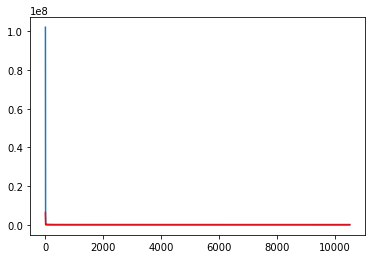

In [23]:
#Because the iterations wher too many graph exactly doesn't show the difference but from here we can conclude that this model 
# is neither overfitting nor underfitting.
plt.plot( J_train_eps)
plt.plot( J_val_eps, color="red")

In [24]:
#Calling the gradient descent function for the given variables alpha was chosen after the 
#observation of the value 0.07 already gives overfitting by looking at the graph of the validation and test sets.
thetas, J_train, J_val = gradient_descent(x_train, y_train, x_val, y_val, 0.065, 5, 1000)

0 	 102012291.32650624 	 6400249.317218698
1 	 86759595.6674305 	 5397813.827294922
2 	 72560760.51944384 	 4552869.262022761
3 	 61826939.24020884 	 3844161.6242731437
4 	 51647583.56398648 	 3240857.319149972
5 	 44107118.03035377 	 2740252.698883735
6 	 36797012.62871646 	 2309012.5650533126
7 	 31511127.186135575 	 1955783.8697284781
8 	 26251162.891719025 	 1647131.8038986295
9 	 22555306.041771643 	 1398218.2319739982
10 	 18761858.583074465 	 1176962.081949457
11 	 16185871.3023719 	 1001837.0987558971
12 	 13442838.474299615 	 842936.7681417556
13 	 11654321.286821073 	 719966.0591654313
14 	 9664817.084745476 	 605597.9273043228
15 	 8428960.731757168 	 519454.8132424429
16 	 6980974.162289182 	 436925.9630817797
17 	 6132073.17525041 	 376757.3193119124
18 	 5074048.981811959 	 317023.444391644
19 	 4495304.884462534 	 275148.27100677567
20 	 3718774.747567555 	 231760.43220371258
21 	 3327980.4955115756 	 202746.455962617
22 	 2755205.0567556773 	 171102.50286061474
23 	 249

192 	 259163.4083416827 	 14817.216526743397
193 	 258944.2966727033 	 14809.168753623066
194 	 258727.21131123963 	 14801.211058056757
195 	 258512.32850326266 	 14793.354492369983
196 	 258299.43004123107 	 14785.58590249708
197 	 258088.66084223017 	 14777.914448193706
198 	 257879.83347052298 	 14770.328835017619
199 	 257673.06656079084 	 14762.836629573845
200 	 257468.19872576353 	 14755.428115901048
201 	 257265.3265655822 	 14748.109520320519
202 	 257064.31075623588 	 14740.87246735532
203 	 256865.22943843197 	 14733.722056555047
204 	 256667.96198848425 	 14726.651051434916
205 	 256472.57109605765 	 14719.663605017578
206 	 256278.95199948509 	 14712.75344920341
207 	 256087.15446841915 	 14705.923942614227
208 	 255897.08720722995 	 14699.169641059565
209 	 255708.7891945122 	 14692.493237122224
210 	 255522.18057764907 	 14685.889988153875
211 	 255337.29133448814 	 14679.362028978123
212 	 255154.05134688364 	 14672.9052148277
213 	 254972.48309705217 	 14666.5212140787

373 	 238267.53711890322 	 14136.173354732286
374 	 238207.46649221698 	 14134.446095824595
375 	 238147.70809807186 	 14132.728587768472
376 	 238088.25938793024 	 14131.020733875675
377 	 238029.11784044484 	 14129.322438657306
378 	 237970.2809609707 	 14127.633607796759
379 	 237911.74628135905 	 14125.954148142735
380 	 237853.51135949872 	 14124.28396768409
381 	 237795.5737791015 	 14122.62297554198
382 	 237737.9311492719 	 14120.971081946578
383 	 237680.58110428267 	 14119.328198228404
384 	 237623.52130317182 	 14117.694236796744
385 	 237566.7494295127 	 14116.069111130428
386 	 237510.26319103185 	 14114.4527357576
387 	 237454.06031937475 	 14112.845026246034
388 	 237398.13856974896 	 14111.245899184434
389 	 237342.49572068255 	 14109.655272172151
390 	 237287.12957368736 	 14108.073063801763
391 	 237232.03795301696 	 14106.49919364857
392 	 237177.21870534553 	 14104.933582254136
393 	 237122.66969952782 	 14103.376151115759
394 	 237068.38882629204 	 14101.8268226708

559 	 230667.30156707522 	 13918.376747963579
560 	 230639.30399540288 	 13917.550004152125
561 	 230611.39744045073 	 13916.725517866224
562 	 230583.5814176457 	 13915.903275721408
563 	 230555.85544599174 	 13915.083264452729
564 	 230528.21904803315 	 13914.265470913271
565 	 230500.67174982495 	 13913.44988207302
566 	 230473.2130809005 	 13912.636485017634
567 	 230445.84257423814 	 13911.825266947038
568 	 230418.55976623084 	 13911.01621517438
569 	 230391.36419665432 	 13910.209317124707
570 	 230364.2554086379 	 13909.404560333829
571 	 230337.2329486304 	 13908.601932447029
572 	 230310.29636637523 	 13907.801421218095
573 	 230283.44521487586 	 13907.003014507978
574 	 230256.67905036837 	 13906.2067002837
575 	 230229.99743229305 	 13905.412466617336
576 	 230203.39992326262 	 13904.620301684696
577 	 230176.88608903735 	 13903.830193764474
578 	 230150.45549849377 	 13903.042131236929
579 	 230124.10772359816 	 13902.256102582942
580 	 230097.84233937896 	 13901.472096382

745 	 226643.4651258587 	 13793.435974753069
746 	 226626.69870214627 	 13792.88213869765
747 	 226609.97173572905 	 13792.329267666371
748 	 226593.28407716213 	 13791.777358321038
749 	 226576.6355778034 	 13791.226407343494
750 	 226560.02608980917 	 13790.676411435483
751 	 226543.45546612865 	 13790.12736731852
752 	 226526.92356049616 	 13789.5792717336
753 	 226510.43022742876 	 13789.032121441183
754 	 226493.97532221887 	 13788.485913220939
755 	 226477.55870093027 	 13787.940643871665
756 	 226461.18022039055 	 13787.396310210988
757 	 226444.83973818962 	 13786.852909075393
758 	 226428.53711267008 	 13786.310437319908
759 	 226412.2722029258 	 13785.768891818085
760 	 226396.04486879354 	 13785.22826946168
761 	 226379.85497085153 	 13784.68856716073
762 	 226363.70237041038 	 13784.149781843142
763 	 226347.5869295123 	 13783.611910454827
764 	 226331.50851092217 	 13783.074949959271
765 	 226315.4669781254 	 13782.538897337654
766 	 226299.4621953207 	 13782.00374958841
7

932 	 224065.68080774165 	 13703.82865864277
933 	 224054.34537082334 	 13703.412701493466
934 	 224043.0311275127 	 13702.997311936577
935 	 224031.73801585447 	 13702.58248862873
936 	 224020.46597414787 	 13702.168230231704
937 	 224009.2149409467 	 13701.754535412512
938 	 223997.98485505447 	 13701.341402843238
939 	 223986.77565552754 	 13700.928831201187
940 	 223975.58728166975 	 13700.51681916861
941 	 223964.4196730343 	 13700.105365432975
942 	 223953.27276941953 	 13699.694468686634
943 	 223942.14651087142 	 13699.28412762708
944 	 223931.04083767658 	 13698.87434095657
945 	 223919.95569036703 	 13698.465107382546
946 	 223908.8910097145 	 13698.056425617107
947 	 223897.8467367327 	 13697.64829437746
948 	 223886.8228126715 	 13697.240712385474
949 	 223875.8191790207 	 13696.833678367977
950 	 223864.83577750527 	 13696.427191056518
951 	 223853.87255008516 	 13696.021249187415
952 	 223842.92943895436 	 13695.615851501749
953 	 223832.00638653952 	 13695.210996745307
9

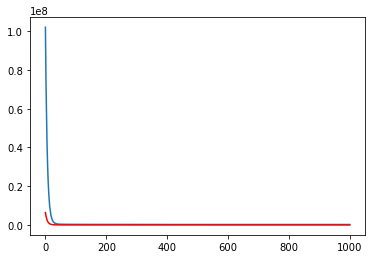

In [25]:
#Painting the graphs of the train and validation cost values as they meet in infinity we can see that this model is not overfitting.
plt.plot( J_train)
plt.plot( J_val, color="red")

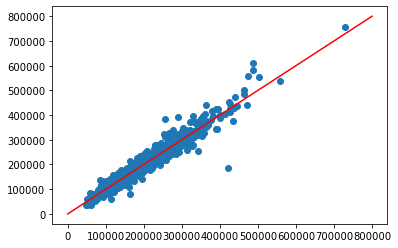

In [26]:
#Painting the graph of the actual cost and my predicted value(red line)
pred_t = np.insert(x_train, 0, values=np.ones(x_train.shape[0]), axis=1) * thetas_eps.T
pred_v = np.insert(x_val, 0, values=np.ones(x_val.shape[0]), axis=1)   * thetas_eps.T

plt.scatter(np.exp(pred_t).tolist(), np.exp(y_train).tolist())
plt.plot([0, 800000], [0, 800000], color='red')

In [27]:
#To get indexes of the homes.
indexes = x_test.index
x_test = np.matrix(x_test.to_numpy())

In [28]:
#Predict the cost values of the main test features and write them into the 'answer.csv' file.
#Because the best results have gradient descent with epsilon I will save their answers.
test_pred = np.insert(x_test, 0, values=np.ones(x_test.shape[0]), axis=1) * thetas_eps.T
test_pred = np.exp(test_pred)

ans = pd.DataFrame()
ans["Id"] = indexes + 1
ans["SalePrice"] = [x[0] for x in test_pred.tolist()]
ans.to_csv("ans.csv", index=False)